<a href="https://colab.research.google.com/github/lapatradaa/BSC_DPDM23/blob/main/Midterm_BscDPDM23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

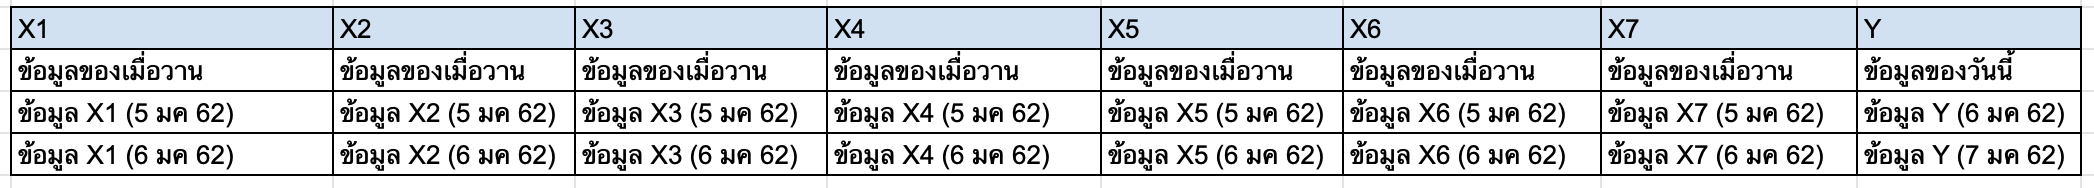

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/bsc2 2566/อุตุ'

Mounted at /content/drive


#ขอนแก่น

##Import data

In [ ]:
press_kk = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', skiprows=4)
Humidity_kk = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', skiprows=4)
ws_kk =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx', skiprows=4)
cd_kk =   pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx', skiprows=4)
dp_kk =   pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx', skiprows=4)
bt_kk =   pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx', skiprows=4)
lw_kk =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx', skiprows=4)
rain_kk =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx', skiprows=4)

In [ ]:
#ทำการเช็คข้อมูลซ้ำ False = ไม่มี
press_kk.duplicated()
Humidity_kk.duplicated()
ws_kk.duplicated()
cd_kk.duplicated()
dp_kk.duplicated()
bt_kk.duplicated()
lw_kk.duplicated()
rain_kk.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
dtype: bool

###กดอากาศ

In [ ]:
press_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
press_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
press_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
press_kk['year'] = press_kk['เดือน-ปี'].dt.year
press_kk['month'] = press_kk['เดือน-ปี'].dt.month
press_kk = press_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
press_kk

,id,สถานี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,2012,2
5,3,352201-หนองคาย จ.หนองคาย,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,1010.07,...,1010.20,1009.78,1009.08,1008.67,1008.41,1008.71,1008.7,1011.83,2012,10
6,4,352201-หนองคาย จ.หนองคาย,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,1008.36,...,1010.51,1011.46,1010.77,1010.16,1010.18,1010.04,1009.54,-,2012,11
7,5,352201-หนองคาย จ.หนองคาย,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,1011.34,...,1016.29,1013.54,1011.60,1010.58,1009.61,1009.9,1011.64,1014.86,2012,12
8,6,352201-หนองคาย จ.หนองคาย,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,1011.64,...,1012.54,1012.09,1012.41,1013.80,1016.45,1015.31,1014.99,1015.58,2013,1
9,7,352201-หนองคาย จ.หนองคาย,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,1008.48,...,1013.40,1011.79,1010.17,1007.95,1006.82,-,-,-,2013,2


In [ ]:
press_kk_melt = press_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
press_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
press_kk_melt.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
press_kk_melt['province_id'] = len(press_kk_melt)*['khonkaen']
press_kk_melt.head()

,สถานี,id,year,month,day,ความกดอากาศ(%),province_id
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1005.47,khonkaen
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1006.65,khonkaen
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1007.49,khonkaen
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.28,khonkaen
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1009.88,khonkaen


In [ ]:
press_kk_in = press_kk_melt[['province_id','year','month','day','ความกดอากาศ(%)']].reset_index()
press_kk_in_re = press_kk_in[['province_id','index','year','month','day','ความกดอากาศ(%)']]
press_kk_in_re["id"] = press_kk_in_re["province_id"].astype(str) +  press_kk_in_re["index"].astype(str)
press_kk_fin = press_kk_in_re[['id','province_id','year','month','day','ความกดอากาศ(%)']]
press_kk_fin



<ipython-input-7-abbee2776784>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press_kk_in_re["id"] = press_kk_in_re["province_id"].astype(str) +  press_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,ความกดอากาศ(%)
0,khonkaen0,khonkaen,2011,10,1,1005.47
1,khonkaen1,khonkaen,2011,10,2,1006.65
2,khonkaen2,khonkaen,2011,10,3,1007.49
3,khonkaen3,khonkaen,2011,10,4,1008.28
4,khonkaen4,khonkaen,2011,10,5,1009.88
...,...,...,...,...,...,...
1700,khonkaen1700,khonkaen,2022,2,27,1014.37
1701,khonkaen1701,khonkaen,2022,2,28,1013.04
1702,khonkaen1702,khonkaen,2022,2,29,1013.37
1703,khonkaen1703,khonkaen,2022,2,30,1013.98


###ความชื้นสัมพันทธ์

In [ ]:
Humidity_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
Humidity_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Humidity_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Humidity_kk['year'] = Humidity_kk['เดือน-ปี'].dt.year
Humidity_kk['month'] = Humidity_kk['เดือน-ปี'].dt.month
Humidity_kk = Humidity_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)


In [ ]:
Humidity_kk_melt = Humidity_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
Humidity_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
Humidity_kk_melt.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)

Humidity_kk_melt['province_id'] = len(Humidity_kk_melt)*['khonkaen']
Humidity_kk_melt.head()


,สถานี,id,year,month,day,ความชื้นสัมพัทธ์(%),province_id
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,83,khonkaen
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,92,khonkaen
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,86,khonkaen
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,80,khonkaen
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,86,khonkaen


In [ ]:
Humidity_kk_melt['province_id'] = len(Humidity_kk_melt)*['khonkaen']
Humidity_kk_in = Humidity_kk_melt[['province_id','year','month','day','ความชื้นสัมพัทธ์(%)']].reset_index()
Humidity_kk_in_re = Humidity_kk_in[['province_id','index','year','month','day','ความชื้นสัมพัทธ์(%)']]


In [ ]:
Humidity_kk_in_re["id"] = Humidity_kk_in_re["province_id"].astype(str) +  Humidity_kk_in_re["index"].astype(str)

Humidity_kk_fin = Humidity_kk_in_re[['id','province_id','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_kk_fin


<ipython-input-11-41d9a8989b7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Humidity_kk_in_re["id"] = Humidity_kk_in_re["province_id"].astype(str) +  Humidity_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,ความชื้นสัมพัทธ์(%)
0,khonkaen0,khonkaen,2011,10,1,83
1,khonkaen1,khonkaen,2011,10,2,92
2,khonkaen2,khonkaen,2011,10,3,86
3,khonkaen3,khonkaen,2011,10,4,80
4,khonkaen4,khonkaen,2011,10,5,86
...,...,...,...,...,...,...
1700,khonkaen1700,khonkaen,2022,2,27,58
1701,khonkaen1701,khonkaen,2022,2,28,62
1702,khonkaen1702,khonkaen,2022,2,29,-
1703,khonkaen1703,khonkaen,2022,2,30,-


###ความเร็วลม

In [ ]:
ws_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
ws_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
ws_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
ws_kk['year'] =  ws_kk['เดือน-ปี'].dt.year
ws_kk['month'] =  ws_kk['เดือน-ปี'].dt.month
ws_kk =  ws_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
ws_kk.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,year,month
0,1,353301-เลย สกษ. จ.เลย,3,2,3,2,2,3,4,3,...,3,5,5,5,4,6,4,5,2011,10
1,2,353301-เลย สกษ. จ.เลย,4,5,3,3,5,2,3,3,...,6,5,5,3,1,3,3,-,2011,11
2,3,353301-เลย สกษ. จ.เลย,3,4,4,4,4,4,4,4,...,6,7,6,5,4,4,6,5,2011,12
3,1,353301-เลย สกษ. จ.เลย,4,2,1,4,4,2,4,6,...,3,4,2,2,1,3,4,4,2012,1
4,2,353301-เลย สกษ. จ.เลย,2,2,3,2,3,1,2,3,...,2,3,2,4,3,3,3,-,2012,2


In [ ]:
ws_kk_melt =  ws_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
ws_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
ws_kk_melt.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
ws_kk_melt['province_id'] = len( ws_kk_melt)*['khonkaen']
ws_kk_melt.head()

,สถานี,id,year,month,day,ความเร็วลม(นอต),province_id
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,3,khonkaen
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,2,khonkaen
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,3,khonkaen
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,2,khonkaen
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,2,khonkaen


In [ ]:
ws_kk_in =  ws_kk_melt[['province_id','year','month','day','ความเร็วลม(นอต)']].reset_index()
ws_kk_in_re =  ws_kk_in[['province_id','index','year','month','day','ความเร็วลม(นอต)']]

ws_kk_in_re["id"] =  ws_kk_in_re["province_id"].astype(str) +   ws_kk_in_re["index"].astype(str)

ws_kk_fin =  ws_kk_in_re[['id','province_id','year','month','day','ความเร็วลม(นอต)']]
ws_kk_fin.head()


<ipython-input-14-a644e0285a4f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ws_kk_in_re["id"] =  ws_kk_in_re["province_id"].astype(str) +   ws_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,ความเร็วลม(นอต)
0,khonkaen0,khonkaen,2011,10,1,3
1,khonkaen1,khonkaen,2011,10,2,2
2,khonkaen2,khonkaen,2011,10,3,3
3,khonkaen3,khonkaen,2011,10,4,2
4,khonkaen4,khonkaen,2011,10,5,2


###จำนวนเมฆ

In [ ]:
cd_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
cd_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
cd_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
cd_kk['year'] =  cd_kk['เดือน-ปี'].dt.year
cd_kk['month'] =  cd_kk['เดือน-ปี'].dt.month
cd_kk =  cd_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)

In [ ]:
cd_kk_melt =  cd_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
cd_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
cd_kk_melt.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
cd_kk_melt['province_id'] = len( cd_kk_melt)*['khonkaen']

In [ ]:
cd_kk_in =  cd_kk_melt[['province_id','year','month','day','จำนวนเมฆ(10ส่วน)']].reset_index()
cd_kk_in_re =  cd_kk_in[['province_id','index','year','month','day','จำนวนเมฆ(10ส่วน)']]

In [ ]:
cd_kk_in_re["id"] =  cd_kk_in_re["province_id"].astype(str) +   cd_kk_in_re["index"].astype(str)
cd_kk_fin =  cd_kk_in_re[['id','province_id','year','month','day','จำนวนเมฆ(10ส่วน)']]
cd_kk_fin.head()


<ipython-input-18-923f61b0714c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_kk_in_re["id"] =  cd_kk_in_re["province_id"].astype(str) +   cd_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,จำนวนเมฆ(10ส่วน)
0,khonkaen0,khonkaen,2011,10,1,9
1,khonkaen1,khonkaen,2011,10,2,10
2,khonkaen2,khonkaen,2011,10,3,10
3,khonkaen3,khonkaen,2011,10,4,8
4,khonkaen4,khonkaen,2011,10,5,10


###อุณหภูมิน้ำค้าง

In [ ]:
dp_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
dp_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
dp_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
dp_kk['year'] =  dp_kk['เดือน-ปี'].dt.year
dp_kk['month'] =  dp_kk['เดือน-ปี'].dt.month
dp_kk =  dp_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
dp_kk_melt =  dp_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
dp_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
dp_kk_melt.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'},inplace=True)
dp_kk_melt['province_id'] = len( dp_kk_melt)*['khonkaen']
dp_kk_in =  dp_kk_melt[['province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']].reset_index()
dp_kk_in_re =  dp_kk_in[['province_id','index','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dp_kk_in_re["id"] =  dp_kk_in_re["province_id"].astype(str) +   dp_kk_in_re["index"].astype(str)
dp_kk_fin =  dp_kk_in_re[['id','province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dp_kk_fin



<ipython-input-19-539f206c6f78>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_kk_in_re["id"] =  dp_kk_in_re["province_id"].astype(str) +   dp_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิจุดน้ำค้าง (เซลเซียส)
0,khonkaen0,khonkaen,2011,10,1,24.2
1,khonkaen1,khonkaen,2011,10,2,24.0
2,khonkaen2,khonkaen,2011,10,3,22.9
3,khonkaen3,khonkaen,2011,10,4,21.9
4,khonkaen4,khonkaen,2011,10,5,21.7
...,...,...,...,...,...,...
1700,khonkaen1700,khonkaen,2022,2,27,15.7
1701,khonkaen1701,khonkaen,2022,2,28,17.5
1702,khonkaen1702,khonkaen,2022,2,29,-
1703,khonkaen1703,khonkaen,2022,2,30,-


###อุณหภมิตุ้มแห้ง

In [ ]:
bt_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
bt_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
bt_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
bt_kk['year'] = bt_kk['เดือน-ปี'].dt.year
bt_kk['month'] = bt_kk['เดือน-ปี'].dt.month
bt_kk = bt_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
bt_kk_melt = bt_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
bt_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
bt_kk_melt.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)
bt_kk_melt['province_id'] = len(bt_kk_melt)*['khonkaen']
bt_kk_in = bt_kk_melt[['province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
bt_kk_in_re = bt_kk_in[['province_id','index','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
bt_kk_in_re["id"] = bt_kk_in_re["province_id"].astype(str) +  bt_kk_in_re["index"].astype(str)
bt_kk_fin = bt_kk_in_re[['id','province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
bt_kk_fin


<ipython-input-20-80e67446c44e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_kk_in_re["id"] = bt_kk_in_re["province_id"].astype(str) +  bt_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิตุ้มแห้ง (เซลเซียส)
0,khonkaen0,khonkaen,2011,10,1,27.6
1,khonkaen1,khonkaen,2011,10,2,25.6
2,khonkaen2,khonkaen,2011,10,3,25.6
3,khonkaen3,khonkaen,2011,10,4,25.8
4,khonkaen4,khonkaen,2011,10,5,24.3
...,...,...,...,...,...,...
1700,khonkaen1700,khonkaen,2022,2,27,25.1
1701,khonkaen1701,khonkaen,2022,2,28,25.9
1702,khonkaen1702,khonkaen,2022,2,29,-
1703,khonkaen1703,khonkaen,2022,2,30,-


###อุณหภูมิต่ำสุด

In [ ]:
lw_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
lw_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
lw_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
lw_kk['year'] = lw_kk['เดือน-ปี'].dt.year
lw_kk['month'] = lw_kk['เดือน-ปี'].dt.month
lw_kk = lw_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
lw_kk_melt = lw_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
lw_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
lw_kk_melt.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซลเซียส)'},inplace=True)
lw_kk_melt['province_id'] = len(lw_kk_melt)*['khonkaen']
lw_kk_in = lw_kk_melt[['province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']].reset_index()
lw_kk_in_re = lw_kk_in[['province_id','index','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
lw_kk_in_re["id"] = lw_kk_in_re["province_id"].astype(str) +  lw_kk_in_re["index"].astype(str)
lw_kk_fin = lw_kk_in_re[['id','province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
lw_kk_fin


<ipython-input-21-608fa0e68395>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_kk_in_re["id"] = lw_kk_in_re["province_id"].astype(str) +  lw_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิต่ำสุด (เซลเซียส)
0,khonkaen0,khonkaen,2011,10,1,24.8
1,khonkaen1,khonkaen,2011,10,2,23.0
2,khonkaen2,khonkaen,2011,10,3,22.1
3,khonkaen3,khonkaen,2011,10,4,22.8
4,khonkaen4,khonkaen,2011,10,5,23.1
...,...,...,...,...,...,...
1700,khonkaen1700,khonkaen,2022,2,27,18.2
1701,khonkaen1701,khonkaen,2022,2,28,-
1702,khonkaen1702,khonkaen,2022,2,29,-
1703,khonkaen1703,khonkaen,2022,2,30,-


###ปริมาณน้ำฝน

In [ ]:
rain_kk.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
rain_kk.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
rain_kk.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
rain_kk['year'] = rain_kk['เดือน-ปี'].dt.year
rain_kk['month'] = rain_kk['เดือน-ปี'].dt.month
rain_kk = rain_kk.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
rain_kk_melt = rain_kk.set_index(['สถานี','id','year','month']).stack().reset_index()
rain_kk_melt.rename(columns={'level_4' : 'day'},inplace=True)
rain_kk_melt.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)

rain_kk_melt['province_id'] = len(rain_kk_melt)*['khonkaen']

rain_kk_in = rain_kk_melt[['province_id','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
rain_kk_in_re = rain_kk_in[['province_id','index','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']]
rain_kk_in_re["id"] = rain_kk_in_re["province_id"].astype(str) +  rain_kk_in_re["index"].astype(str)

rain_kk_fin = rain_kk_in_re[['id','province_id','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']]
rain_kk_fin


<ipython-input-22-1b469fd86c17>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_kk_in_re["id"] = rain_kk_in_re["province_id"].astype(str) +  rain_kk_in_re["index"].astype(str)


,id,province_id,year,month,day,ปริมาณน้ำฝน(มิลลิเมตร)
0,khonkaen0,khonkaen,2011,10,1,1.4
1,khonkaen1,khonkaen,2011,10,2,17.7
2,khonkaen2,khonkaen,2011,10,3,3
3,khonkaen3,khonkaen,2011,10,4,0
4,khonkaen4,khonkaen,2011,10,5,2.2
...,...,...,...,...,...,...
1700,khonkaen1700,khonkaen,2022,2,27,0
1701,khonkaen1701,khonkaen,2022,2,28,-
1702,khonkaen1702,khonkaen,2022,2,29,-
1703,khonkaen1703,khonkaen,2022,2,30,-


###รวมตาราง จ.ขอนแก่น

In [ ]:
kk1 = press_kk_fin[['id','province_id','year','month','day','ความกดอากาศ(%)']]
kk2 =  Humidity_kk_fin[['id','ความชื้นสัมพัทธ์(%)']]
kk3 =   ws_kk_fin[['id','ความเร็วลม(นอต)']]
kk4 =  cd_kk_fin[['id','จำนวนเมฆ(10ส่วน)']]
kk5 =   dp_kk_fin[['id','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
kk6 = bt_kk_fin[['id','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
kk7 = lw_kk_fin[['id','อุณหภูมิต่ำสุด (เซลเซียส)']]
kk8 =   rain_kk_fin[['id','ปริมาณน้ำฝน(มิลลิเมตร)']]

In [ ]:
merged_kk = pd.merge(kk1, kk2, how='inner')
merged_kk = pd.merge(merged_kk, kk3, how='inner')
merged_kk = pd.merge(merged_kk, kk4, how='inner')
merged_kk = pd.merge(merged_kk, kk5, how='inner')
merged_kk = pd.merge(merged_kk, kk6, how='inner')
merged_kk = pd.merge(merged_kk, kk7, how='inner')
merged_kk = pd.merge(merged_kk, kk8, how='inner')
merged_kk

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
0,khonkaen0,khonkaen,2011,10,1,1005.47,83,3,9,24.2,27.6,24.8,1.4
1,khonkaen1,khonkaen,2011,10,2,1006.65,92,2,10,24.0,25.6,23.0,17.7
2,khonkaen2,khonkaen,2011,10,3,1007.49,86,3,10,22.9,25.6,22.1,3
3,khonkaen3,khonkaen,2011,10,4,1008.28,80,2,8,21.9,25.8,22.8,0
4,khonkaen4,khonkaen,2011,10,5,1009.88,86,2,10,21.7,24.3,23.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,khonkaen1700,khonkaen,2022,2,27,1014.37,58,2,2,15.7,25.1,18.2,0
1701,khonkaen1701,khonkaen,2022,2,28,1013.04,62,2,2,17.5,25.9,-,-
1702,khonkaen1702,khonkaen,2022,2,29,1013.37,-,-,-,-,-,-,-
1703,khonkaen1703,khonkaen,2022,2,30,1013.98,-,-,-,-,-,-,-


#นครพนม

##เข้าข้อมูลกดอากาศ

In [ ]:
#ความกด แทนเป็น pressure_ชื่อจังหวัด
#data_from_gsheets.colums = data_from_gsheets.iloc[2] #set heade
press_nkpanom = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',  skiprows=4 )


In [ ]:
press_nkpanom

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.86,1011.24,1008.82,1007.46,1008.65,1010.53,1010.41,...,1011.63,1010.67,1010.17,1009.78,1008.53,1008.22,1008.94,1009.54,1012.76,1010.840323
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1013.26,1011.77,1010.84,1010.77,1011.02,1011.49,1010.06,...,1008.87,1010.93,1011.45,1011.22,1011.43,1010.70,1010.66,1009.89,-,1010.984000
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1010.12,1010.89,1011.93,1011.30,1012.01,1013.16,1012.68,...,1016.81,1017.31,1014.43,1012.45,1011.32,1010.47,1010.69,1014.48,1016.22,1012.551935
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1015.52,1014.01,1015.36,1014.22,1012.47,1013.17,1013.46,...,1014.11,1013.65,1013.57,1013.25,1015.31,1016.70,1015.92,1015.57,1016.14,1014.798710
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.63,1014.87,1014.45,1014.43,1013.88,1011.52,1008.45,...,1017.17,1014.55,1012.39,1011.08,1008.62,1007.56,-,-,-,1012.171429


In [ ]:
press_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
press_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
press_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
press_nkpanom.head()

,id,สถานี,เดือน-ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000


In [ ]:
press_nkpanom['year'] = press_nkpanom['เดือน-ปี'].dt.year
press_nkpanom['month'] = press_nkpanom['เดือน-ปี'].dt.month
press_nkpanom = press_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
press_nkpanom.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,year,month
0,1,352201-หนองคาย จ.หนองคาย,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,1010.68,...,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,1007.38,...,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,1012.96,...,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,1019.57,...,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,1011.78,...,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,2012,2


In [ ]:
#ใช้stack เพื่อ transposed column to row
press_nkpanom_melt = press_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
press_nkpanom_melt

,สถานี,id,year,month,level_4,0
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1006.3
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1007.38
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1008.07
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.44
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1010.51
...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,1016.43
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1013.53
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,1013.37
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,1013.98


In [ ]:
press_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True) #เปลี่ยนชื่อเป็นday
press_nkpanom_melt.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
press_nkpanom_melt

,สถานี,id,year,month,day,ความกดอากาศ(%)
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1006.3
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1007.38
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1008.07
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.44
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1010.51
...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,1016.43
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1013.53
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,1013.37
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,1013.98


In [ ]:
press_nkpanom_melt['province_id'] = len(press_nkpanom_melt)*['nakornpanom']
press_nkpanom_melt


,สถานี,id,year,month,day,ความกดอากาศ(%),province_id
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1006.3,nakornpanom
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1007.38,nakornpanom
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1008.07,nakornpanom
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.44,nakornpanom
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1010.51,nakornpanom
...,...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,1016.43,nakornpanom
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1013.53,nakornpanom
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,1013.37,nakornpanom
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,1013.98,nakornpanom


In [ ]:
press_nkpanom_in = press_nkpanom_melt[['province_id','year','month','day','ความกดอากาศ(%)']].reset_index()
press_nkpanom_in_re = press_nkpanom_in[['province_id','index','year','month','day','ความกดอากาศ(%)']]
press_nkpanom_in_re

,province_id,index,year,month,day,ความกดอากาศ(%)
0,nakornpanom,0,2011,10,1,1006.3
1,nakornpanom,1,2011,10,2,1007.38
2,nakornpanom,2,2011,10,3,1008.07
3,nakornpanom,3,2011,10,4,1008.44
4,nakornpanom,4,2011,10,5,1010.51
...,...,...,...,...,...,...
1700,nakornpanom,1700,2022,2,27,1016.43
1701,nakornpanom,1701,2022,2,28,1013.53
1702,nakornpanom,1702,2022,2,29,1013.37
1703,nakornpanom,1703,2022,2,30,1013.98


In [ ]:
press_nkpanom_in_re["id"] = press_nkpanom_in_re["province_id"].astype(str) +  press_nkpanom_in_re["index"].astype(str)

<ipython-input-33-95820054e3c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press_nkpanom_in_re["id"] = press_nkpanom_in_re["province_id"].astype(str) +  press_nkpanom_in_re["index"].astype(str)


In [ ]:
press_nkpanom_fin = press_nkpanom_in_re[['id','province_id','year','month','day','ความกดอากาศ(%)']]
press_nkpanom_fin

,id,province_id,year,month,day,ความกดอากาศ(%)
0,nakornpanom0,nakornpanom,2011,10,1,1006.3
1,nakornpanom1,nakornpanom,2011,10,2,1007.38
2,nakornpanom2,nakornpanom,2011,10,3,1008.07
3,nakornpanom3,nakornpanom,2011,10,4,1008.44
4,nakornpanom4,nakornpanom,2011,10,5,1010.51
...,...,...,...,...,...,...
1700,nakornpanom1700,nakornpanom,2022,2,27,1016.43
1701,nakornpanom1701,nakornpanom,2022,2,28,1013.53
1702,nakornpanom1702,nakornpanom,2022,2,29,1013.37
1703,nakornpanom1703,nakornpanom,2022,2,30,1013.98


##เข้าข้อมูลความชื้นสัมพัทธ์

In [ ]:
Humidity_nkpanom = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',  skiprows=4 )

In [ ]:
Humidity_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
Humidity_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Humidity_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)

In [ ]:
Humidity_nkpanom['year'] = Humidity_nkpanom['เดือน-ปี'].dt.year
Humidity_nkpanom['month'] = Humidity_nkpanom['เดือน-ปี'].dt.month
Humidity_nkpanom = Humidity_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
Humidity_nkpanom.head()

,id,สถานี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,year,month
0,1,357201-นครพนม จ.นครพนม,95,84,74,72,87,88,81,82,...,67,70,69,71,66,72,70,69,2011,10
1,2,357201-นครพนม จ.นครพนม,69,67,70,68,71,68,73,72,...,66,70,78,74,69,66,65,-,2011,11
2,3,357201-นครพนม จ.นครพนม,64,56,62,67,69,77,73,68,...,54,60,61,70,71,63,66,70,2011,12
3,1,357201-นครพนม จ.นครพนม,71,70,64,59,68,69,66,67,...,74,62,67,74,71,61,59,62,2012,1
4,2,357201-นครพนม จ.นครพนม,68,69,66,71,71,71,64,61,...,61,64,64,68,76,69,-,-,2012,2


In [ ]:
Humidity_nkpanom_melt = Humidity_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
Humidity_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
Humidity_nkpanom_melt.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
Humidity_nkpanom_melt.head()

,สถานี,id,year,month,day,ความชื้นสัมพัทธ์(%)
0,357201-นครพนม จ.นครพนม,1,2011,10,1,95
1,357201-นครพนม จ.นครพนม,1,2011,10,2,84
2,357201-นครพนม จ.นครพนม,1,2011,10,3,74
3,357201-นครพนม จ.นครพนม,1,2011,10,4,72
4,357201-นครพนม จ.นครพนม,1,2011,10,5,87


In [ ]:
Humidity_nkpanom_melt['province_id'] = len(Humidity_nkpanom_melt)*['nakornpanom']
Humidity_nkpanom_in = Humidity_nkpanom_melt[['province_id','year','month','day','ความชื้นสัมพัทธ์(%)']].reset_index()
Humidity_nkpanom_in_re = Humidity_nkpanom_in[['province_id','index','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_nkpanom_in_re["id"] = Humidity_nkpanom_in_re["province_id"].astype(str) +  Humidity_nkpanom_in_re["index"].astype(str)
Humidity_nkpanom_fin = Humidity_nkpanom_in_re[['id','province_id','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_nkpanom_fin

<ipython-input-39-c74c650334b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Humidity_nkpanom_in_re["id"] = Humidity_nkpanom_in_re["province_id"].astype(str) +  Humidity_nkpanom_in_re["index"].astype(str)


,id,province_id,year,month,day,ความชื้นสัมพัทธ์(%)
0,nakornpanom0,nakornpanom,2011,10,1,95
1,nakornpanom1,nakornpanom,2011,10,2,84
2,nakornpanom2,nakornpanom,2011,10,3,74
3,nakornpanom3,nakornpanom,2011,10,4,72
4,nakornpanom4,nakornpanom,2011,10,5,87
...,...,...,...,...,...,...
1700,nakornpanom1700,nakornpanom,2022,2,27,52
1701,nakornpanom1701,nakornpanom,2022,2,28,60
1702,nakornpanom1702,nakornpanom,2022,2,29,-
1703,nakornpanom1703,nakornpanom,2022,2,30,-


##เข้าความเร็วลม

In [ ]:
ws_nkpanom = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx',  skiprows=4 )
ws_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
ws_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
ws_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
ws_nkpanom.head()

,id,สถานี,เดือน-ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,1,1,2,2,1,0,2,...,1,2,2,1,2,2,1,1,1,1.322581
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,1,1,1,1,1,1,...,3,3,2,2,1,1,1,1,-,1.200000
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,1,2,2,1,1,1,1,...,1,3,3,1,2,1,1,2,2,1.741935
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,2,2,3,5,2,3,3,...,4,1,5,1,1,1,4,5,4,2.448276
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,1,3,4,0,0,1,1,...,1,2,2,3,3,3,1,2,-,2.200000


In [ ]:
ws_nkpanom['year'] = ws_nkpanom['เดือน-ปี'].dt.year
ws_nkpanom['month'] = ws_nkpanom['เดือน-ปี'].dt.month
ws_nkpanom = ws_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)

In [ ]:
ws_nkpanom_melt = ws_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
ws_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
ws_nkpanom_melt.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
ws_nkpanom_melt.head()

,สถานี,id,year,month,day,ความเร็วลม(นอต)
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,1
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,1
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,2
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,2
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,1


In [ ]:
ws_nkpanom_melt['province_id'] = len(ws_nkpanom_melt)*['nakornpanom']
ws_nkpanom_in = ws_nkpanom_melt[['province_id','year','month','day','ความเร็วลม(นอต)']].reset_index()
ws_nkpanom_in_re = ws_nkpanom_in[['province_id','index','year','month','day','ความเร็วลม(นอต)']]
ws_nkpanom_in_re

,province_id,index,year,month,day,ความเร็วลม(นอต)
0,nakornpanom,0,2011,10,1,1
1,nakornpanom,1,2011,10,2,1
2,nakornpanom,2,2011,10,3,2
3,nakornpanom,3,2011,10,4,2
4,nakornpanom,4,2011,10,5,1
...,...,...,...,...,...,...
1700,nakornpanom,1700,2022,2,27,2
1701,nakornpanom,1701,2022,2,28,1
1702,nakornpanom,1702,2022,2,29,-
1703,nakornpanom,1703,2022,2,30,-


In [ ]:
ws_nkpanom_in_re["id"] = ws_nkpanom_in_re["province_id"].astype(str) +  ws_nkpanom_in_re['index'].astype(str)
ws_nkpanom_fin = ws_nkpanom_in_re[['id','province_id','year','month','day','ความเร็วลม(นอต)']]
ws_nkpanom_fin

<ipython-input-44-0f7b1fdd60a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ws_nkpanom_in_re["id"] = ws_nkpanom_in_re["province_id"].astype(str) +  ws_nkpanom_in_re['index'].astype(str)


,id,province_id,year,month,day,ความเร็วลม(นอต)
0,nakornpanom0,nakornpanom,2011,10,1,1
1,nakornpanom1,nakornpanom,2011,10,2,1
2,nakornpanom2,nakornpanom,2011,10,3,2
3,nakornpanom3,nakornpanom,2011,10,4,2
4,nakornpanom4,nakornpanom,2011,10,5,1
...,...,...,...,...,...,...
1700,nakornpanom1700,nakornpanom,2022,2,27,2
1701,nakornpanom1701,nakornpanom,2022,2,28,1
1702,nakornpanom1702,nakornpanom,2022,2,29,-
1703,nakornpanom1703,nakornpanom,2022,2,30,-


##นำเข้าจำนวนเมฆ

In [ ]:

cd_nkpanom = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',  skiprows=4 )
cd_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
cd_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
cd_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
cd_nkpanom.head()


,id,สถานี,เดือน-ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,7,8,8,10,10,9,...,2,2,2,2,3,3,4,2,4,5.903226
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,2,2,2,3,5,7,9,...,4,4,4,2,2,2,1,1,-,3.066667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,2,2,2,4,4,7,8,...,4,2,2,2,2,1,2,1,1,3.290323
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,4,6,4,2,5,...,5,3,2,2,2,3,3,6,5,4.741935
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,5,5,8,7,3,3,2,...,2,2,2,3,7,6,2,1,-,2.966667


In [ ]:
cd_nkpanom['year'] = cd_nkpanom['เดือน-ปี'].dt.year
cd_nkpanom['month'] = cd_nkpanom['เดือน-ปี'].dt.month
cd_nkpanom = cd_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)


In [ ]:
cd_nkpanom_melt = cd_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
cd_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
cd_nkpanom_melt.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)


In [ ]:
cd_nkpanom_melt['province_id'] = len(cd_nkpanom_melt)*['nakornpanom']
cd_nkpanom_in = cd_nkpanom_melt[['province_id','year','month','day','จำนวนเมฆ(10ส่วน)']].reset_index()
cd_nkpanom_in_re = cd_nkpanom_in[['province_id','index','year','month','day','จำนวนเมฆ(10ส่วน)']]

cd_nkpanom_in_re["id"] = cd_nkpanom_in_re["province_id"].astype(str) +  cd_nkpanom_in_re["index"].astype(str)
cd_nkpanom_fin = cd_nkpanom_in_re[['id','province_id','year','month','day','จำนวนเมฆ(10ส่วน)']]
cd_nkpanom_fin




<ipython-input-48-b85ccc38fd92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_nkpanom_in_re["id"] = cd_nkpanom_in_re["province_id"].astype(str) +  cd_nkpanom_in_re["index"].astype(str)


,id,province_id,year,month,day,จำนวนเมฆ(10ส่วน)
0,nakornpanom0,nakornpanom,2011,10,1,10
1,nakornpanom1,nakornpanom,2011,10,2,7
2,nakornpanom2,nakornpanom,2011,10,3,8
3,nakornpanom3,nakornpanom,2011,10,4,8
4,nakornpanom4,nakornpanom,2011,10,5,10
...,...,...,...,...,...,...
1700,nakornpanom1700,nakornpanom,2022,2,27,1
1701,nakornpanom1701,nakornpanom,2022,2,28,0
1702,nakornpanom1702,nakornpanom,2022,2,29,-
1703,nakornpanom1703,nakornpanom,2022,2,30,-


##เข้าอุณหภูมิจุดน้ำค้าง (เซลเซียส)

In [ ]:
dp_nkpanom = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',  skiprows=4 )
dp_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
dp_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
dp_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)


In [ ]:
dp_nkpanom['year'] = dp_nkpanom['เดือน-ปี'].dt.year
dp_nkpanom['month'] = dp_nkpanom['เดือน-ปี'].dt.month
dp_nkpanom = dp_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
dp_nkpanom_melt = dp_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
dp_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
dp_nkpanom_melt.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'},inplace=True)



In [ ]:
dp_nkpanom_melt['province_id'] = len(dp_nkpanom_melt)*['nakornpanom']
dp_nkpanom_in = dp_nkpanom_melt[['province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']].reset_index()
dp_nkpanom_in_re = dp_nkpanom_in[['province_id','index','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dp_nkpanom_in_re["id"] = dp_nkpanom_in_re["province_id"].astype(str) +  dp_nkpanom_in_re["index"].astype(str)
dp_nkpanom_fin = dp_nkpanom_in_re[['id','province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dp_nkpanom_fin



<ipython-input-51-44d613427b8a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_nkpanom_in_re["id"] = dp_nkpanom_in_re["province_id"].astype(str) +  dp_nkpanom_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิจุดน้ำค้าง (เซลเซียส)
0,nakornpanom0,nakornpanom,2011,10,1,25.1
1,nakornpanom1,nakornpanom,2011,10,2,23.1
2,nakornpanom2,nakornpanom,2011,10,3,20.1
3,nakornpanom3,nakornpanom,2011,10,4,18.9
4,nakornpanom4,nakornpanom,2011,10,5,20.7
...,...,...,...,...,...,...
1700,nakornpanom1700,nakornpanom,2022,2,27,13.2
1701,nakornpanom1701,nakornpanom,2022,2,28,14.9
1702,nakornpanom1702,nakornpanom,2022,2,29,-
1703,nakornpanom1703,nakornpanom,2022,2,30,-


##เข้าอุณหภูมิจตุ้มแห้ง (เซลเซียส)

In [ ]:
bt_nkpanom = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',  skiprows=4 )

In [ ]:
bt_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
bt_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
bt_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
bt_nkpanom['year'] = bt_nkpanom['เดือน-ปี'].dt.year
bt_nkpanom['month'] = bt_nkpanom['เดือน-ปี'].dt.month
bt_nkpanom = bt_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)

In [ ]:
bt_nkpanom_melt = bt_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
bt_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
bt_nkpanom_melt.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)
bt_nkpanom_melt['province_id'] = len(bt_nkpanom_melt)*['nakornpanom']
bt_nkpanom_in = bt_nkpanom_melt[['province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
bt_nkpanom_in_re = bt_nkpanom_in[['province_id','index','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]

In [ ]:
bt_nkpanom_in_re["id"] = bt_nkpanom_in_re["province_id"].astype(str) +  bt_nkpanom_in_re["index"].astype(str)
bt_nkpanom_fin = bt_nkpanom_in_re[['id','province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
bt_nkpanom_fin


<ipython-input-55-f194d50cf437>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_nkpanom_in_re["id"] = bt_nkpanom_in_re["province_id"].astype(str) +  bt_nkpanom_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิตุ้มแห้ง (เซลเซียส)
0,nakornpanom0,nakornpanom,2011,10,1,25.9
1,nakornpanom1,nakornpanom,2011,10,2,26.1
2,nakornpanom2,nakornpanom,2011,10,3,25.3
3,nakornpanom3,nakornpanom,2011,10,4,24.7
4,nakornpanom4,nakornpanom,2011,10,5,23.1
...,...,...,...,...,...,...
1700,nakornpanom1700,nakornpanom,2022,2,27,24.1
1701,nakornpanom1701,nakornpanom,2022,2,28,24.0
1702,nakornpanom1702,nakornpanom,2022,2,29,-
1703,nakornpanom1703,nakornpanom,2022,2,30,-


##เข้าอุณหภูมิต่ำสุด (เซลเซียส)

In [ ]:
lw_nkpanom = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',  skiprows=4 )

In [ ]:
lw_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
lw_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
lw_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
lw_nkpanom['year'] = lw_nkpanom['เดือน-ปี'].dt.year
lw_nkpanom['month'] = lw_nkpanom['เดือน-ปี'].dt.month
lw_nkpanom = lw_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)

In [ ]:
lw_nkpanom_melt = lw_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
lw_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
lw_nkpanom_melt.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซลเซียส)'},inplace=True)
lw_nkpanom_melt['province_id'] = len(lw_nkpanom_melt)*['nakornpanom']
lw_nkpanom_in = lw_nkpanom_melt[['province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']].reset_index()
lw_nkpanom_in_re = lw_nkpanom_in[['province_id','index','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]


In [ ]:
lw_nkpanom_in_re["id"] = lw_nkpanom_in_re["province_id"].astype(str) +  lw_nkpanom_in_re["index"].astype(str)
lw_nkpanom_fin = lw_nkpanom_in_re[['id','province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
lw_nkpanom_fin


<ipython-input-59-b26997b91829>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_nkpanom_in_re["id"] = lw_nkpanom_in_re["province_id"].astype(str) +  lw_nkpanom_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิต่ำสุด (เซลเซียส)
0,nakornpanom0,nakornpanom,2011,10,1,25.0
1,nakornpanom1,nakornpanom,2011,10,2,23.4
2,nakornpanom2,nakornpanom,2011,10,3,22.2
3,nakornpanom3,nakornpanom,2011,10,4,20.6
4,nakornpanom4,nakornpanom,2011,10,5,21.1
...,...,...,...,...,...,...
1700,nakornpanom1700,nakornpanom,2022,2,27,18.1
1701,nakornpanom1701,nakornpanom,2022,2,28,16
1702,nakornpanom1702,nakornpanom,2022,2,29,-
1703,nakornpanom1703,nakornpanom,2022,2,30,-


##เข้าปริมาณน้ำฝน(มิลลิเมตร)

In [ ]:
rain_nkpanom = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',  skiprows=4 )

In [ ]:
rain_nkpanom.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
rain_nkpanom.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
rain_nkpanom.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
rain_nkpanom['year'] = rain_nkpanom['เดือน-ปี'].dt.year
rain_nkpanom['month'] = rain_nkpanom['เดือน-ปี'].dt.month
rain_nkpanom = rain_nkpanom.drop(['เดือน-ปี','Unnamed: 34'], axis =1)

In [ ]:
rain_nkpanom_melt = rain_nkpanom.set_index(['สถานี','id','year','month']).stack().reset_index()
rain_nkpanom_melt.rename(columns={'level_4' : 'day'},inplace=True)
rain_nkpanom_melt.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)

rain_nkpanom_melt['province_id'] = len(rain_nkpanom_melt)*['nakornpanom']

rain_nkpanom_in = rain_nkpanom_melt[['province_id','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
rain_nkpanom_in_re = rain_nkpanom_in[['province_id','index','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']]

In [ ]:
rain_nkpanom_in_re["id"] = rain_nkpanom_in_re["province_id"].astype(str) +  rain_nkpanom_in_re["index"].astype(str)

rain_nkpanom_fin = rain_nkpanom_in_re[['id','province_id','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']]
rain_nkpanom_fin


<ipython-input-63-56e0b309adff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_nkpanom_in_re["id"] = rain_nkpanom_in_re["province_id"].astype(str) +  rain_nkpanom_in_re["index"].astype(str)


,id,province_id,year,month,day,ปริมาณน้ำฝน(มิลลิเมตร)
0,nakornpanom0,nakornpanom,2011,10,1,17
1,nakornpanom1,nakornpanom,2011,10,2,0.3
2,nakornpanom2,nakornpanom,2011,10,3,0
3,nakornpanom3,nakornpanom,2011,10,4,0.3
4,nakornpanom4,nakornpanom,2011,10,5,1.9
...,...,...,...,...,...,...
1700,nakornpanom1700,nakornpanom,2022,2,27,0
1701,nakornpanom1701,nakornpanom,2022,2,28,0
1702,nakornpanom1702,nakornpanom,2022,2,29,-
1703,nakornpanom1703,nakornpanom,2022,2,30,-


##รวมตาราง จ.นครพนม

In [ ]:
df1 = press_nkpanom_fin[['id','province_id','year','month','day','ความกดอากาศ(%)']]
df2 =  Humidity_nkpanom_fin[['id','ความชื้นสัมพัทธ์(%)']]
df3 =   ws_nkpanom_fin[['id','ความเร็วลม(นอต)']]
df4 =  cd_nkpanom_fin[['id','จำนวนเมฆ(10ส่วน)']]
df5 =   dp_nkpanom_fin[['id','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
df6 = bt_nkpanom_fin[['id','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
df7 = lw_nkpanom_fin[['id','อุณหภูมิต่ำสุด (เซลเซียส)']]
df8 =   rain_nkpanom_fin[['id','ปริมาณน้ำฝน(มิลลิเมตร)']]

In [ ]:
merged_df = pd.merge(df1, df2, how='inner')
merged_df = pd.merge(merged_df, df3, how='inner')
merged_df = pd.merge(merged_df, df4, how='inner')
merged_df = pd.merge(merged_df, df5, how='inner')
merged_df = pd.merge(merged_df, df6, how='inner')
merged_df = pd.merge(merged_df, df7, how='inner')
merged_df = pd.merge(merged_df, df8, how='inner')
merged_df

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
0,nakornpanom0,nakornpanom,2011,10,1,1006.3,95,1,10,25.1,25.9,25.0,17
1,nakornpanom1,nakornpanom,2011,10,2,1007.38,84,1,7,23.1,26.1,23.4,0.3
2,nakornpanom2,nakornpanom,2011,10,3,1008.07,74,2,8,20.1,25.3,22.2,0
3,nakornpanom3,nakornpanom,2011,10,4,1008.44,72,2,8,18.9,24.7,20.6,0.3
4,nakornpanom4,nakornpanom,2011,10,5,1010.51,87,1,10,20.7,23.1,21.1,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,nakornpanom1700,nakornpanom,2022,2,27,1016.43,52,2,1,13.2,24.1,18.1,0
1701,nakornpanom1701,nakornpanom,2022,2,28,1013.53,60,1,0,14.9,24.0,16,0
1702,nakornpanom1702,nakornpanom,2022,2,29,1013.37,-,-,-,-,-,-,-
1703,nakornpanom1703,nakornpanom,2022,2,30,1013.98,-,-,-,-,-,-,-


#สกลนคร

##เข้าข้อมูล

In [ ]:
press_skn = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', skiprows=4)
Humidity_skn = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', skiprows=4)
ws_skn =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx', skiprows=4)
cd_skn =   pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx', skiprows=4)
dp_skn =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx', skiprows=4)
bt_skn =   pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx', skiprows=4)
lw_skn =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx', skiprows=4)
rain_skn =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx', skiprows=4)

##กดอากาศ

In [ ]:
press_skn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
press_skn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
press_skn.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
press_skn['year'] = press_skn['เดือน-ปี'].dt.year
press_skn['month'] = press_skn['เดือน-ปี'].dt.month
press_skn = press_skn.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
press_skn
press_skn_melt = press_skn.set_index(['สถานี','id','year','month']).stack().reset_index()
press_skn_melt.rename(columns={'level_4' : 'day'},inplace=True)
press_skn_melt.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
press_skn_melt['province_id'] = len(press_skn_melt)*['sakonakorn']
press_skn_melt.head()
press_skn_in = press_skn_melt[['province_id','year','month','day','ความกดอากาศ(%)']].reset_index()
press_skn_in_re = press_skn_in[['province_id','index','year','month','day','ความกดอากาศ(%)']]
press_skn_in_re["id"] = press_skn_in_re["province_id"].astype(str) + press_skn_in_re["index"].astype(str)
press_skn_fin = press_skn_in_re[['id','province_id','year','month','day','ความกดอากาศ(%)']]
press_skn_fin

<ipython-input-67-ab3a69138ace>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press_skn_in_re["id"] = press_skn_in_re["province_id"].astype(str) + press_skn_in_re["index"].astype(str)


,id,province_id,year,month,day,ความกดอากาศ(%)
0,sakonakorn0,sakonakorn,2011,10,1,1005.84
1,sakonakorn1,sakonakorn,2011,10,2,1007.16
2,sakonakorn2,sakonakorn,2011,10,3,1007.87
3,sakonakorn3,sakonakorn,2011,10,4,1008.56
4,sakonakorn4,sakonakorn,2011,10,5,1010.55
...,...,...,...,...,...,...
1700,sakonakorn1700,sakonakorn,2022,2,27,1014.95
1701,sakonakorn1701,sakonakorn,2022,2,28,1012.89
1702,sakonakorn1702,sakonakorn,2022,2,29,1013.37
1703,sakonakorn1703,sakonakorn,2022,2,30,1013.98


##ชื้นสัมพัน

In [ ]:
Humidity_skn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
Humidity_skn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Humidity_skn.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Humidity_skn['year'] = Humidity_skn['เดือน-ปี'].dt.year
Humidity_skn['month'] = Humidity_skn['เดือน-ปี'].dt.month
Humidity_skn = Humidity_skn.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
Humidity_skn_melt = Humidity_skn.set_index(['สถานี','id','year','month']).stack().reset_index()
Humidity_skn_melt.rename(columns={'level_4' : 'day'},inplace=True)
Humidity_skn_melt.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)


Humidity_skn_melt['province_id'] = len(Humidity_skn_melt)*['sakonakorn']
Humidity_skn_in = Humidity_skn_melt[['province_id','year','month','day','ความชื้นสัมพัทธ์(%)']].reset_index()
Humidity_skn_in_re = Humidity_skn_in[['province_id','index','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_skn_in_re["id"] = Humidity_skn_in_re["province_id"].astype(str) + Humidity_skn_in_re["index"].astype(str)
Humidity_skn_fin = Humidity_skn_in_re[['id','province_id','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_skn_fin


<ipython-input-68-7c14a299ba33>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Humidity_skn_in_re["id"] = Humidity_skn_in_re["province_id"].astype(str) + Humidity_skn_in_re["index"].astype(str)


,id,province_id,year,month,day,ความชื้นสัมพัทธ์(%)
0,sakonakorn0,sakonakorn,2011,10,1,87
1,sakonakorn1,sakonakorn,2011,10,2,88
2,sakonakorn2,sakonakorn,2011,10,3,77
3,sakonakorn3,sakonakorn,2011,10,4,75
4,sakonakorn4,sakonakorn,2011,10,5,87
...,...,...,...,...,...,...
1700,sakonakorn1700,sakonakorn,2022,2,27,65
1701,sakonakorn1701,sakonakorn,2022,2,28,68
1702,sakonakorn1702,sakonakorn,2022,2,29,-
1703,sakonakorn1703,sakonakorn,2022,2,30,-


##เร็วลม

In [ ]:
ws_skn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
ws_skn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
ws_skn.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
ws_skn['year'] = ws_skn['เดือน-ปี'].dt.year
ws_skn['month'] = ws_skn['เดือน-ปี'].dt.month
ws_skn = ws_skn.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
ws_skn.head()
ws_skn_melt = ws_skn.set_index(['สถานี','id','year','month']).stack().reset_index()
ws_skn_melt.rename(columns={'level_4' : 'day'},inplace=True)
ws_skn_melt.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
ws_skn_melt['province_id'] = len( ws_skn_melt)*['sakonakorn']
ws_skn_melt.head()
ws_skn_in = ws_skn_melt[['province_id','year','month','day','ความเร็วลม(นอต)']].reset_index()
ws_skn_in_re = ws_skn_in[['province_id','index','year','month','day','ความเร็วลม(นอต)']]
ws_skn_in_re["id"] = ws_skn_in_re["province_id"].astype(str) + ws_skn_in_re["index"].astype(str)
ws_skn_fin = ws_skn_in_re[['id','province_id','year','month','day','ความเร็วลม(นอต)']]
ws_skn_fin.head()


<ipython-input-69-e69e27bd5c07>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ws_skn_in_re["id"] = ws_skn_in_re["province_id"].astype(str) + ws_skn_in_re["index"].astype(str)


,id,province_id,year,month,day,ความเร็วลม(นอต)
0,sakonakorn0,sakonakorn,2011,10,1,1
1,sakonakorn1,sakonakorn,2011,10,2,1
2,sakonakorn2,sakonakorn,2011,10,3,2
3,sakonakorn3,sakonakorn,2011,10,4,2
4,sakonakorn4,sakonakorn,2011,10,5,1


##จำนวนเมฆ

In [ ]:
cd_skn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
cd_skn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
cd_skn.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
cd_skn['year'] =  cd_skn['เดือน-ปี'].dt.year
cd_skn['month'] =  cd_skn['เดือน-ปี'].dt.month
cd_skn =  cd_skn.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
cd_skn_melt =  cd_skn.set_index(['สถานี','id','year','month']).stack().reset_index()
cd_skn_melt.rename(columns={'level_4' : 'day'},inplace=True)
cd_skn_melt.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
cd_skn_melt['province_id'] = len( cd_skn_melt)*['sakonakorn']
cd_skn_in =  cd_skn_melt[['province_id','year','month','day','จำนวนเมฆ(10ส่วน)']].reset_index()
cd_skn_in_re =  cd_skn_in[['province_id','index','year','month','day','จำนวนเมฆ(10ส่วน)']]
cd_skn_in_re["id"] =  cd_skn_in_re["province_id"].astype(str) +   cd_skn_in_re["index"].astype(str)
cd_skn_fin =  cd_skn_in_re[['id','province_id','year','month','day','จำนวนเมฆ(10ส่วน)']]
cd_skn_fin




<ipython-input-70-3e2ac15e7d6b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_skn_in_re["id"] =  cd_skn_in_re["province_id"].astype(str) +   cd_skn_in_re["index"].astype(str)


,id,province_id,year,month,day,จำนวนเมฆ(10ส่วน)
0,sakonakorn0,sakonakorn,2011,10,1,9
1,sakonakorn1,sakonakorn,2011,10,2,9
2,sakonakorn2,sakonakorn,2011,10,3,7
3,sakonakorn3,sakonakorn,2011,10,4,7
4,sakonakorn4,sakonakorn,2011,10,5,9
...,...,...,...,...,...,...
1700,sakonakorn1700,sakonakorn,2022,2,27,3
1701,sakonakorn1701,sakonakorn,2022,2,28,0
1702,sakonakorn1702,sakonakorn,2022,2,29,1
1703,sakonakorn1703,sakonakorn,2022,2,30,1


##จุดน้ำค้าง

In [ ]:
dp_skn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
dp_skn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
dp_skn.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
dp_skn['year'] = dp_skn['เดือน-ปี'].dt.year
dp_skn['month'] = dp_skn['เดือน-ปี'].dt.month
dp_skn = dp_skn.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
dp_skn_melt = dp_skn.set_index(['สถานี','id','year','month']).stack().reset_index()
dp_skn_melt.rename(columns={'level_4' : 'day'},inplace=True)
dp_skn_melt.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'},inplace=True)
dp_skn_melt['province_id'] = len( dp_skn_melt)*['sakonakorn']
dp_skn_in = dp_skn_melt[['province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']].reset_index()
dp_skn_in_re = dp_skn_in[['province_id','index','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dp_skn_in_re["id"] = dp_skn_in_re["province_id"].astype(str) + dp_skn_in_re["index"].astype(str)
dp_skn_fin = dp_skn_in_re[['id','province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dp_skn_fin

<ipython-input-71-e5fecaa97a63>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_skn_in_re["id"] = dp_skn_in_re["province_id"].astype(str) + dp_skn_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิจุดน้ำค้าง (เซลเซียส)
0,sakonakorn0,sakonakorn,2011,10,1,24.5
1,sakonakorn1,sakonakorn,2011,10,2,23.6
2,sakonakorn2,sakonakorn,2011,10,3,21.1
3,sakonakorn3,sakonakorn,2011,10,4,20.0
4,sakonakorn4,sakonakorn,2011,10,5,21.2
...,...,...,...,...,...,...
1700,sakonakorn1700,sakonakorn,2022,2,27,15.7
1701,sakonakorn1701,sakonakorn,2022,2,28,17.3
1702,sakonakorn1702,sakonakorn,2022,2,29,-
1703,sakonakorn1703,sakonakorn,2022,2,30,-


##ตุ้มแห้ง

In [ ]:
bt_skn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
bt_skn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
bt_skn.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
bt_skn['year'] = bt_skn['เดือน-ปี'].dt.year
bt_skn['month'] = bt_skn['เดือน-ปี'].dt.month
bt_skn = bt_skn.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
bt_skn_melt = bt_skn.set_index(['สถานี','id','year','month']).stack().reset_index()
bt_skn_melt.rename(columns={'level_4' : 'day'},inplace=True)
bt_skn_melt.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)
bt_skn_melt['province_id'] = len(bt_skn_melt)*['sakonakorn']
bt_skn_in = bt_skn_melt[['province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
bt_skn_in_re = bt_skn_in[['province_id','index','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
bt_skn_in_re["id"] = bt_skn_in_re["province_id"].astype(str) +  bt_skn_in_re["index"].astype(str)
bt_skn_fin = bt_skn_in_re[['id','province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
bt_skn_fin

<ipython-input-72-091b6e8adf4a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_skn_in_re["id"] = bt_skn_in_re["province_id"].astype(str) +  bt_skn_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิตุ้มแห้ง (เซลเซียส)
0,sakonakorn0,sakonakorn,2011,10,1,26.9
1,sakonakorn1,sakonakorn,2011,10,2,25.9
2,sakonakorn2,sakonakorn,2011,10,3,25.7
3,sakonakorn3,sakonakorn,2011,10,4,25.2
4,sakonakorn4,sakonakorn,2011,10,5,23.6
...,...,...,...,...,...,...
1700,sakonakorn1700,sakonakorn,2022,2,27,23.2
1701,sakonakorn1701,sakonakorn,2022,2,28,24.4
1702,sakonakorn1702,sakonakorn,2022,2,29,-
1703,sakonakorn1703,sakonakorn,2022,2,30,-


##ต่ำสุด

In [ ]:
lw_skn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
lw_skn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
lw_skn.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
lw_skn['year'] = lw_skn['เดือน-ปี'].dt.year
lw_skn['month'] = lw_skn['เดือน-ปี'].dt.month
lw_skn = lw_skn.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
lw_skn_melt = lw_skn.set_index(['สถานี','id','year','month']).stack().reset_index()
lw_skn_melt.rename(columns={'level_4' : 'day'},inplace=True)
lw_skn_melt.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซลเซียส)'},inplace=True)
lw_skn_melt['province_id'] = len(lw_skn_melt)*['sakonakorn']
lw_skn_in = lw_skn_melt[['province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']].reset_index()
lw_skn_in_re = lw_skn_in[['province_id','index','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
lw_skn_in_re["id"] = lw_skn_in_re["province_id"].astype(str) +  lw_skn_in_re["index"].astype(str)
lw_skn_fin = lw_skn_in_re[['id','province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
lw_skn_fin

<ipython-input-73-80970389e9b4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_skn_in_re["id"] = lw_skn_in_re["province_id"].astype(str) +  lw_skn_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิต่ำสุด (เซลเซียส)
0,sakonakorn0,sakonakorn,2011,10,1,24.5
1,sakonakorn1,sakonakorn,2011,10,2,23.1
2,sakonakorn2,sakonakorn,2011,10,3,22.6
3,sakonakorn3,sakonakorn,2011,10,4,21.8
4,sakonakorn4,sakonakorn,2011,10,5,22.5
...,...,...,...,...,...,...
1700,sakonakorn1700,sakonakorn,2022,2,27,16.1
1701,sakonakorn1701,sakonakorn,2022,2,28,-
1702,sakonakorn1702,sakonakorn,2022,2,29,-
1703,sakonakorn1703,sakonakorn,2022,2,30,-


##ปริมาณฝน

In [ ]:
rain_skn.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
rain_skn.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
rain_skn.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
rain_skn['year'] = rain_skn['เดือน-ปี'].dt.year
rain_skn['month'] = rain_skn['เดือน-ปี'].dt.month
rain_skn = rain_skn.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
rain_skn_melt = rain_skn.set_index(['สถานี','id','year','month']).stack().reset_index()
rain_skn_melt.rename(columns={'level_4' : 'day'},inplace=True)
rain_skn_melt.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)

rain_skn_melt['province_id'] = len(rain_skn_melt)*['sakonakorn']

rain_skn_in = rain_skn_melt[['province_id','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
rain_skn_in_re = rain_skn_in[['province_id','index','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']]
rain_skn_in_re["id"] = rain_skn_in_re["province_id"].astype(str) +  rain_skn_in_re["index"].astype(str)

rain_skn_fin = rain_skn_in_re[['id','province_id','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']]
rain_skn_fin


<ipython-input-74-b6a6dd386c82>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_skn_in_re["id"] = rain_skn_in_re["province_id"].astype(str) +  rain_skn_in_re["index"].astype(str)


,id,province_id,year,month,day,ปริมาณน้ำฝน(มิลลิเมตร)
0,sakonakorn0,sakonakorn,2011,10,1,84.8
1,sakonakorn1,sakonakorn,2011,10,2,28.1
2,sakonakorn2,sakonakorn,2011,10,3,0
3,sakonakorn3,sakonakorn,2011,10,4,T
4,sakonakorn4,sakonakorn,2011,10,5,5.5
...,...,...,...,...,...,...
1700,sakonakorn1700,sakonakorn,2022,2,27,0
1701,sakonakorn1701,sakonakorn,2022,2,28,-
1702,sakonakorn1702,sakonakorn,2022,2,29,-
1703,sakonakorn1703,sakonakorn,2022,2,30,-


##รวมตาราง จ.สกลนคร

In [ ]:
skn1 = press_skn_fin[['id','province_id','year','month','day','ความกดอากาศ(%)']]
skn2 =  Humidity_skn_fin[['id','ความชื้นสัมพัทธ์(%)']]
skn3 =   ws_skn_fin[['id','ความเร็วลม(นอต)']]
skn4 =  cd_skn_fin[['id','จำนวนเมฆ(10ส่วน)']]
skn5 =   dp_skn_fin[['id','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
skn6 = bt_skn_fin[['id','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
skn7 = lw_skn_fin[['id','อุณหภูมิต่ำสุด (เซลเซียส)']]
skn8 =   rain_skn_fin[['id','ปริมาณน้ำฝน(มิลลิเมตร)']]

In [ ]:
merged_skn = pd.merge(skn1, skn2, how='inner')
merged_skn = pd.merge(merged_skn, skn3, how='inner')
merged_skn = pd.merge(merged_skn, skn4, how='inner')
merged_skn = pd.merge(merged_skn, skn5, how='inner')
merged_skn = pd.merge(merged_skn, skn6, how='inner')
merged_skn = pd.merge(merged_skn, skn7, how='inner')
merged_skn = pd.merge(merged_skn, skn8, how='inner')
merged_skn

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
0,sakonakorn0,sakonakorn,2011,10,1,1005.84,87,1,9,24.5,26.9,24.5,84.8
1,sakonakorn1,sakonakorn,2011,10,2,1007.16,88,1,9,23.6,25.9,23.1,28.1
2,sakonakorn2,sakonakorn,2011,10,3,1007.87,77,2,7,21.1,25.7,22.6,0
3,sakonakorn3,sakonakorn,2011,10,4,1008.56,75,2,7,20.0,25.2,21.8,T
4,sakonakorn4,sakonakorn,2011,10,5,1010.55,87,1,9,21.2,23.6,22.5,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,sakonakorn1700,sakonakorn,2022,2,27,1014.95,65,3,3,15.7,23.2,16.1,0
1701,sakonakorn1701,sakonakorn,2022,2,28,1012.89,68,2,0,17.3,24.4,-,-
1702,sakonakorn1702,sakonakorn,2022,2,29,1013.37,-,-,1,-,-,-,-
1703,sakonakorn1703,sakonakorn,2022,2,30,1013.98,-,-,1,-,-,-,-


#หนองคาย

##เข้าข้อมูล

In [ ]:
press_nki = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', skiprows=4)
Humidity_nki = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', skiprows=4)
ws_nki =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx', skiprows=4)
cd_nki =   pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx', skiprows=4)
dp_nki =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx', skiprows=4)
bt_nki =   pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx', skiprows=4)
lw_nki =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx', skiprows=4)
rain_nki =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx', skiprows=4)

In [ ]:
press_nki.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
press_nki.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
press_nki.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
press_nki['year'] = press_nki['เดือน-ปี'].dt.year
press_nki['month'] = press_nki['เดือน-ปี'].dt.month
press_nki = press_nki.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
press_nki
press_nki_melt = press_nki.set_index(['สถานี','id','year','month']).stack().reset_index()
press_nki_melt.rename(columns={'level_4' : 'day'},inplace=True)
press_nki_melt.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
press_nki_melt['province_id'] = len(press_nki_melt)*['nongkai']
press_nki_melt.head()
press_nki_in = press_nki_melt[['province_id','year','month','day','ความกดอากาศ(%)']].reset_index()
press_nki_in_re = press_nki_in[['province_id','index','year','month','day','ความกดอากาศ(%)']]
press_nki_in_re["id"] = press_nki_in_re["province_id"].astype(str) + press_nki_in_re["index"].astype(str)
press_nki_fin = press_nki_in_re[['id','province_id','year','month','day','ความกดอากาศ(%)']]
press_nki_fin

<ipython-input-78-9fd0cd08868a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press_nki_in_re["id"] = press_nki_in_re["province_id"].astype(str) + press_nki_in_re["index"].astype(str)


,id,province_id,year,month,day,ความกดอากาศ(%)
0,nongkai0,nongkai,2011,10,1,1005.34
1,nongkai1,nongkai,2011,10,2,1006.67
2,nongkai2,nongkai,2011,10,3,1007.39
3,nongkai3,nongkai,2011,10,4,1008.11
4,nongkai4,nongkai,2011,10,5,1009.69
...,...,...,...,...,...,...
1700,nongkai1700,nongkai,2022,2,27,1015.31
1701,nongkai1701,nongkai,2022,2,28,1013.06
1702,nongkai1702,nongkai,2022,2,29,-
1703,nongkai1703,nongkai,2022,2,30,-


In [ ]:
Humidity_nki.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
Humidity_nki.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Humidity_nki.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Humidity_nki['year'] = Humidity_nki['เดือน-ปี'].dt.year
Humidity_nki['month'] = Humidity_nki['เดือน-ปี'].dt.month
Humidity_nki = Humidity_nki.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
Humidity_nki_melt = Humidity_nki.set_index(['สถานี','id','year','month']).stack().reset_index()
Humidity_nki_melt.rename(columns={'level_4' : 'day'},inplace=True)
Humidity_nki_melt.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)


Humidity_nki_melt['province_id'] = len(Humidity_nki_melt)*['nongkai']
Humidity_nki_in = Humidity_nki_melt[['province_id','year','month','day','ความชื้นสัมพัทธ์(%)']].reset_index()
Humidity_nki_in_re = Humidity_nki_in[['province_id','index','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_nki_in_re["id"] = Humidity_nki_in_re["province_id"].astype(str) + Humidity_nki_in_re["index"].astype(str)

Humidity_nki_fin = Humidity_nki_in_re[['id','province_id','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_nki_fin


<ipython-input-79-f80c67203cfd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Humidity_nki_in_re["id"] = Humidity_nki_in_re["province_id"].astype(str) + Humidity_nki_in_re["index"].astype(str)


,id,province_id,year,month,day,ความชื้นสัมพัทธ์(%)
0,nongkai0,nongkai,2011,10,1,89
1,nongkai1,nongkai,2011,10,2,91
2,nongkai2,nongkai,2011,10,3,78
3,nongkai3,nongkai,2011,10,4,75
4,nongkai4,nongkai,2011,10,5,90
...,...,...,...,...,...,...
1700,nongkai1700,nongkai,2022,2,27,62
1701,nongkai1701,nongkai,2022,2,28,65
1702,nongkai1702,nongkai,2022,2,29,-
1703,nongkai1703,nongkai,2022,2,30,-


In [ ]:
ws_nki.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
ws_nki.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
ws_nki.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
ws_nki['year'] = ws_nki['เดือน-ปี'].dt.year
ws_nki['month'] = ws_nki['เดือน-ปี'].dt.month
ws_nki = ws_nki.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
ws_nki.head()
ws_nki_melt = ws_nki.set_index(['สถานี','id','year','month']).stack().reset_index()
ws_nki_melt.rename(columns={'level_4' : 'day'},inplace=True)
ws_nki_melt.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
ws_nki_melt['province_id'] = len( ws_nki_melt)*['nongkai']
ws_nki_melt.head()
ws_nki_in = ws_nki_melt[['province_id','year','month','day','ความเร็วลม(นอต)']].reset_index()
ws_nki_in_re = ws_nki_in[['province_id','index','year','month','day','ความเร็วลม(นอต)']]

ws_nki_in_re["id"] = ws_nki_in_re["province_id"].astype(str) + ws_nki_in_re["index"].astype(str)

ws_nki_fin = ws_nki_in_re[['id','province_id','year','month','day','ความเร็วลม(นอต)']]
ws_nki_fin.head()


<ipython-input-80-a9a3242ccf64>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ws_nki_in_re["id"] = ws_nki_in_re["province_id"].astype(str) + ws_nki_in_re["index"].astype(str)


,id,province_id,year,month,day,ความเร็วลม(นอต)
0,nongkai0,nongkai,2011,10,1,1
1,nongkai1,nongkai,2011,10,2,4
2,nongkai2,nongkai,2011,10,3,4
3,nongkai3,nongkai,2011,10,4,2
4,nongkai4,nongkai,2011,10,5,1


In [ ]:
cd_nki.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
cd_nki.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
cd_nki.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)

cd_nki['year'] =  cd_nki['เดือน-ปี'].dt.year
cd_nki['month'] =  cd_nki['เดือน-ปี'].dt.month
cd_nki =  cd_nki.drop(['เดือน-ปี','Unnamed: 34'], axis =1)

cd_nki_melt =  cd_nki.set_index(['สถานี','id','year','month']).stack().reset_index()
cd_nki_melt.rename(columns={'level_4' : 'day'},inplace=True)
cd_nki_melt.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)

cd_nki_melt['province_id'] = len( cd_nki_melt)*['nongkai']

cd_nki_in =  cd_nki_melt[['province_id','year','month','day','จำนวนเมฆ(10ส่วน)']].reset_index()
cd_nki_in_re =  cd_nki_in[['province_id','index','year','month','day','จำนวนเมฆ(10ส่วน)']]

cd_nki_in_re["id"] =  cd_nki_in_re["province_id"].astype(str) +   cd_nki_in_re["index"].astype(str)

cd_nki_fin =  cd_nki_in_re[['id','province_id','year','month','day','จำนวนเมฆ(10ส่วน)']]
cd_nki_fin


<ipython-input-81-80edac2ce409>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_nki_in_re["id"] =  cd_nki_in_re["province_id"].astype(str) +   cd_nki_in_re["index"].astype(str)


,id,province_id,year,month,day,จำนวนเมฆ(10ส่วน)
0,nongkai0,nongkai,2011,10,1,10
1,nongkai1,nongkai,2011,10,2,10
2,nongkai2,nongkai,2011,10,3,8
3,nongkai3,nongkai,2011,10,4,9
4,nongkai4,nongkai,2011,10,5,9
...,...,...,...,...,...,...
1697,nongkai1697,nongkai,2022,2,27,3
1698,nongkai1698,nongkai,2022,2,28,2
1699,nongkai1699,nongkai,2022,2,29,1
1700,nongkai1700,nongkai,2022,2,30,1


In [ ]:
dp_nki.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
dp_nki.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
dp_nki.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
dp_nki['year'] = dp_nki['เดือน-ปี'].dt.year
dp_nki['month'] = dp_nki['เดือน-ปี'].dt.month
dp_nki = dp_nki.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
dp_nki_melt = dp_nki.set_index(['สถานี','id','year','month']).stack().reset_index()
dp_nki_melt.rename(columns={'level_4' : 'day'},inplace=True)
dp_nki_melt.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'},inplace=True)
dp_nki_melt['province_id'] = len( dp_nki_melt)*['nongkai']
dp_nki_in = dp_nki_melt[['province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']].reset_index()
dp_nki_in_re = dp_nki_in[['province_id','index','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dp_nki_in_re["id"] = dp_nki_in_re["province_id"].astype(str) + dp_nki_in_re["index"].astype(str)
dp_nki_fin = dp_nki_in_re[['id','province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dp_nki_fin

<ipython-input-82-4d858b4f5562>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_nki_in_re["id"] = dp_nki_in_re["province_id"].astype(str) + dp_nki_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิจุดน้ำค้าง (เซลเซียส)
0,nongkai0,nongkai,2011,10,1,24.6
1,nongkai1,nongkai,2011,10,2,23.8
2,nongkai2,nongkai,2011,10,3,22.4
3,nongkai3,nongkai,2011,10,4,21.9
4,nongkai4,nongkai,2011,10,5,23.3
...,...,...,...,...,...,...
1700,nongkai1700,nongkai,2022,2,27,15.8
1701,nongkai1701,nongkai,2022,2,28,17.8
1702,nongkai1702,nongkai,2022,2,29,16.6
1703,nongkai1703,nongkai,2022,2,30,14.9


In [ ]:
bt_nki.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
bt_nki.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
bt_nki.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
bt_nki['year'] = bt_nki['เดือน-ปี'].dt.year
bt_nki['month'] = bt_nki['เดือน-ปี'].dt.month
bt_nki = bt_nki.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
bt_nki_melt = bt_nki.set_index(['สถานี','id','year','month']).stack().reset_index()
bt_nki_melt.rename(columns={'level_4' : 'day'},inplace=True)
bt_nki_melt.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)
bt_nki_melt['province_id'] = len(bt_nki_melt)*['nongkai']
bt_nki_in = bt_nki_melt[['province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
bt_nki_in_re = bt_nki_in[['province_id','index','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
bt_nki_in_re["id"] = bt_nki_in_re["province_id"].astype(str) +  bt_nki_in_re["index"].astype(str)
bt_nki_fin = bt_nki_in_re[['id','province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
bt_nki_fin


<ipython-input-83-1719703f3703>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_nki_in_re["id"] = bt_nki_in_re["province_id"].astype(str) +  bt_nki_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิตุ้มแห้ง (เซลเซียส)
0,nongkai0,nongkai,2011,10,1,26.7
1,nongkai1,nongkai,2011,10,2,25.5
2,nongkai2,nongkai,2011,10,3,27.0
3,nongkai3,nongkai,2011,10,4,26.8
4,nongkai4,nongkai,2011,10,5,24.9
...,...,...,...,...,...,...
1700,nongkai1700,nongkai,2022,2,27,23.8
1701,nongkai1701,nongkai,2022,2,28,25.4
1702,nongkai1702,nongkai,2022,2,29,-
1703,nongkai1703,nongkai,2022,2,30,-


In [ ]:
lw_nki.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
lw_nki.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
lw_nki.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
lw_nki['year'] = lw_nki['เดือน-ปี'].dt.year
lw_nki['month'] = lw_nki['เดือน-ปี'].dt.month
lw_nki = lw_nki.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
lw_nki_melt = lw_nki.set_index(['สถานี','id','year','month']).stack().reset_index()
lw_nki_melt.rename(columns={'level_4' : 'day'},inplace=True)
lw_nki_melt.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซลเซียส)'},inplace=True)
lw_nki_melt['province_id'] = len(lw_nki_melt)*['nongkai']
lw_nki_in = lw_nki_melt[['province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']].reset_index()
lw_nki_in_re = lw_nki_in[['province_id','index','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
lw_nki_in_re["id"] = lw_nki_in_re["province_id"].astype(str) +  lw_nki_in_re["index"].astype(str)
lw_nki_fin = lw_nki_in_re[['id','province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
lw_nki_fin


<ipython-input-84-f967b36408b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_nki_in_re["id"] = lw_nki_in_re["province_id"].astype(str) +  lw_nki_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิต่ำสุด (เซลเซียส)
0,nongkai0,nongkai,2011,10,1,25.3
1,nongkai1,nongkai,2011,10,2,23.3
2,nongkai2,nongkai,2011,10,3,23.6
3,nongkai3,nongkai,2011,10,4,23.8
4,nongkai4,nongkai,2011,10,5,23.3
...,...,...,...,...,...,...
1700,nongkai1700,nongkai,2022,2,27,17.5
1701,nongkai1701,nongkai,2022,2,28,19
1702,nongkai1702,nongkai,2022,2,29,-
1703,nongkai1703,nongkai,2022,2,30,-


In [ ]:
rain_nki.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
rain_nki.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
rain_nki.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
rain_nki['year'] = rain_nki['เดือน-ปี'].dt.year
rain_nki['month'] = rain_nki['เดือน-ปี'].dt.month
rain_nki = rain_nki.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
rain_nki_melt = rain_nki.set_index(['สถานี','id','year','month']).stack().reset_index()
rain_nki_melt.rename(columns={'level_4' : 'day'},inplace=True)
rain_nki_melt.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)

rain_nki_melt['province_id'] = len(rain_nki_melt)*['nongkai']

rain_nki_in = rain_nki_melt[['province_id','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
rain_nki_in_re = rain_nki_in[['province_id','index','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']]
rain_nki_in_re["id"] = rain_nki_in_re["province_id"].astype(str) +  rain_nki_in_re["index"].astype(str)
rain_nki_fin = rain_nki_in_re[['id','province_id','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']]
rain_nki_fin



<ipython-input-85-b05f65893bd0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_nki_in_re["id"] = rain_nki_in_re["province_id"].astype(str) +  rain_nki_in_re["index"].astype(str)


,id,province_id,year,month,day,ปริมาณน้ำฝน(มิลลิเมตร)
0,nongkai0,nongkai,2011,10,1,48.6
1,nongkai1,nongkai,2011,10,2,59
2,nongkai2,nongkai,2011,10,3,0
3,nongkai3,nongkai,2011,10,4,1
4,nongkai4,nongkai,2011,10,5,19.1
...,...,...,...,...,...,...
1700,nongkai1700,nongkai,2022,2,27,0
1701,nongkai1701,nongkai,2022,2,28,0
1702,nongkai1702,nongkai,2022,2,29,-
1703,nongkai1703,nongkai,2022,2,30,-


##รวมตาราง จ.หนองคาย

In [ ]:
nki1 = press_nki_fin[['id','province_id','year','month','day','ความกดอากาศ(%)']]
nki2 =  Humidity_nki_fin[['id','ความชื้นสัมพัทธ์(%)']]
nki3 =   ws_nki_fin[['id','ความเร็วลม(นอต)']]
nki4 =  cd_nki_fin[['id','จำนวนเมฆ(10ส่วน)']]
nki5 =   dp_nki_fin[['id','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
nki6 = bt_nki_fin[['id','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
nki7 = lw_nki_fin[['id','อุณหภูมิต่ำสุด (เซลเซียส)']]
nki8 =   rain_nki_fin[['id','ปริมาณน้ำฝน(มิลลิเมตร)']]
merged_nki = pd.merge(nki1, nki2, how='inner')
merged_nki = pd.merge(merged_nki, nki3, how='inner')
merged_nki = pd.merge(merged_nki, nki4, how='inner')
merged_nki = pd.merge(merged_nki, nki5, how='inner')
merged_nki = pd.merge(merged_nki, nki6, how='inner')
merged_nki = pd.merge(merged_nki, nki7, how='inner')
merged_nki = pd.merge(merged_nki, nki8, how='inner')
merged_nki



,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
0,nongkai0,nongkai,2011,10,1,1005.34,89,1,10,24.6,26.7,25.3,48.6
1,nongkai1,nongkai,2011,10,2,1006.67,91,4,10,23.8,25.5,23.3,59
2,nongkai2,nongkai,2011,10,3,1007.39,78,4,8,22.4,27.0,23.6,0
3,nongkai3,nongkai,2011,10,4,1008.11,75,2,9,21.9,26.8,23.8,1
4,nongkai4,nongkai,2011,10,5,1009.69,90,1,9,23.3,24.9,23.3,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,nongkai1697,nongkai,2022,2,24,1019.23,66,2,3,13.2,20.3,14.0,0
1698,nongkai1698,nongkai,2022,2,25,1018.46,68,2,2,14.3,20.7,13.9,0
1699,nongkai1699,nongkai,2022,2,26,1016.68,65,1,1,15.2,22.7,15.0,0
1700,nongkai1700,nongkai,2022,2,27,1015.31,62,2,1,15.8,23.8,17.5,0


#เลย

##เข้าข้อมูล

In [ ]:
press_loey = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx', skiprows=4)
Humidity_loey = pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx', skiprows=4)
ws_loey =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx', skiprows=4)
cd_loey =   pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx', skiprows=4)
dp_loey =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx', skiprows=4)
bt_loey =   pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx', skiprows=4)
lw_loey =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx', skiprows=4)
rain_loey =  pd.read_excel('/content/drive/MyDrive/bsc2 2566/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx', skiprows=4)

In [ ]:
press_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
press_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
press_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
press_loey['year'] = press_loey['เดือน-ปี'].dt.year
press_loey['month'] = press_loey['เดือน-ปี'].dt.month
press_loey = press_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
press_loey_melt = press_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
press_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
press_loey_melt.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
press_loey_melt['province_id'] = len(press_loey_melt)*['loey']
press_loey_melt.head()
press_loey_in = press_loey_melt[['province_id','year','month','day','ความกดอากาศ(%)']].reset_index()
press_loey_in_re = press_loey_in[['province_id','index','year','month','day','ความกดอากาศ(%)']]
press_loey_in_re["id"] = press_loey_in_re["province_id"].astype(str) + press_loey_in_re["index"].astype(str)
press_loey_fin = press_loey_in_re[['id','province_id','year','month','day','ความกดอากาศ(%)']]
press_loey_fin

<ipython-input-88-cc678049332c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  press_loey_in_re["id"] = press_loey_in_re["province_id"].astype(str) + press_loey_in_re["index"].astype(str)


,id,province_id,year,month,day,ความกดอากาศ(%)
0,loey0,loey,2011,10,1,1005.12
1,loey1,loey,2011,10,2,1006.51
2,loey2,loey,2011,10,3,1007.81
3,loey3,loey,2011,10,4,1008.15
4,loey4,loey,2011,10,5,1009.21
...,...,...,...,...,...,...
1700,loey1700,loey,2022,2,27,1014.97
1701,loey1701,loey,2022,2,28,1012.88
1702,loey1702,loey,2022,2,29,-
1703,loey1703,loey,2022,2,30,-


In [ ]:
Humidity_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
Humidity_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
Humidity_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
Humidity_loey['year'] = Humidity_loey['เดือน-ปี'].dt.year
Humidity_loey['month'] = Humidity_loey['เดือน-ปี'].dt.month
Humidity_loey = Humidity_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
Humidity_loey_melt = Humidity_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
Humidity_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
Humidity_loey_melt.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
Humidity_loey_melt['province_id'] = len(Humidity_loey_melt)*['loey']
Humidity_loey_melt.head()
Humidity_loey_melt['province_id'] = len(Humidity_loey_melt)*['loey']
Humidity_loey_in = Humidity_loey_melt[['province_id','year','month','day','ความชื้นสัมพัทธ์(%)']].reset_index()
Humidity_loey_in_re = Humidity_loey_in[['province_id','index','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_loey_in_re["id"] = Humidity_loey_in_re["province_id"].astype(str) + Humidity_loey_in_re["index"].astype(str)
Humidity_loey_fin = Humidity_loey_in_re[['id','province_id','year','month','day','ความชื้นสัมพัทธ์(%)']]
Humidity_loey_fin


<ipython-input-89-df5e94c2d485>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Humidity_loey_in_re["id"] = Humidity_loey_in_re["province_id"].astype(str) + Humidity_loey_in_re["index"].astype(str)


,id,province_id,year,month,day,ความชื้นสัมพัทธ์(%)
0,loey0,loey,2011,10,1,90
1,loey1,loey,2011,10,2,95
2,loey2,loey,2011,10,3,92
3,loey3,loey,2011,10,4,89
4,loey4,loey,2011,10,5,86
...,...,...,...,...,...,...
1700,loey1700,loey,2022,2,27,74
1701,loey1701,loey,2022,2,28,72
1702,loey1702,loey,2022,2,29,-
1703,loey1703,loey,2022,2,30,-


In [ ]:
ws_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
ws_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
ws_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
ws_loey['year'] = ws_loey['เดือน-ปี'].dt.year
ws_loey['month'] = ws_loey['เดือน-ปี'].dt.month
ws_loey = ws_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
ws_loey.head()
ws_loey_melt = ws_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
ws_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
ws_loey_melt.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
ws_loey_melt['province_id'] = len( ws_loey_melt)*['loey']
ws_loey_melt.head()
ws_loey_in = ws_loey_melt[['province_id','year','month','day','ความเร็วลม(นอต)']].reset_index()
ws_loey_in_re = ws_loey_in[['province_id','index','year','month','day','ความเร็วลม(นอต)']]

ws_loey_in_re["id"] = ws_loey_in_re["province_id"].astype(str) + ws_loey_in_re["index"].astype(str)

ws_loey_fin = ws_loey_in_re[['id','province_id','year','month','day','ความเร็วลม(นอต)']]
ws_loey_fin.head()

<ipython-input-90-93cf7c5100b2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ws_loey_in_re["id"] = ws_loey_in_re["province_id"].astype(str) + ws_loey_in_re["index"].astype(str)


,id,province_id,year,month,day,ความเร็วลม(นอต)
0,loey0,loey,2011,10,1,2
1,loey1,loey,2011,10,2,2
2,loey2,loey,2011,10,3,3
3,loey3,loey,2011,10,4,2
4,loey4,loey,2011,10,5,3


In [ ]:
cd_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
cd_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
cd_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)

cd_loey['year'] =  cd_loey['เดือน-ปี'].dt.year
cd_loey['month'] =  cd_loey['เดือน-ปี'].dt.month
cd_loey =  cd_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)

cd_loey_melt =  cd_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
cd_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
cd_loey_melt.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)

cd_loey_melt['province_id'] = len( cd_loey_melt)*['loey']

cd_loey_in =  cd_loey_melt[['province_id','year','month','day','จำนวนเมฆ(10ส่วน)']].reset_index()
cd_loey_in_re =  cd_loey_in[['province_id','index','year','month','day','จำนวนเมฆ(10ส่วน)']]

cd_loey_in_re["id"] =  cd_loey_in_re["province_id"].astype(str) +   cd_loey_in_re["index"].astype(str)

cd_loey_fin =  cd_loey_in_re[['id','province_id','year','month','day','จำนวนเมฆ(10ส่วน)']]
cd_loey_fin


<ipython-input-91-7f4bbe57a657>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_loey_in_re["id"] =  cd_loey_in_re["province_id"].astype(str) +   cd_loey_in_re["index"].astype(str)


,id,province_id,year,month,day,จำนวนเมฆ(10ส่วน)
0,loey0,loey,2011,10,1,8
1,loey1,loey,2011,10,2,10
2,loey2,loey,2011,10,3,10
3,loey3,loey,2011,10,4,9
4,loey4,loey,2011,10,5,8
...,...,...,...,...,...,...
1710,loey1710,loey,2022,2,27,3
1711,loey1711,loey,2022,2,28,2
1712,loey1712,loey,2022,2,29,-
1713,loey1713,loey,2022,2,30,-


In [ ]:
dp_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
dp_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
dp_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
dp_loey['year'] = dp_loey['เดือน-ปี'].dt.year
dp_loey['month'] = dp_loey['เดือน-ปี'].dt.month
dp_loey = dp_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
dp_loey_melt = dp_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
dp_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
dp_loey_melt.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)'},inplace=True)
dp_loey_melt['province_id'] = len( dp_loey_melt)*['loey']
dp_loey_in = dp_loey_melt[['province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']].reset_index()
dp_loey_in_re = dp_loey_in[['province_id','index','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dp_loey_in_re["id"] = dp_loey_in_re["province_id"].astype(str) + dp_loey_in_re["index"].astype(str)
dp_loey_fin = dp_loey_in_re[['id','province_id','year','month','day','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
dp_loey_fin


<ipython-input-92-bffa6beb3baf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_loey_in_re["id"] = dp_loey_in_re["province_id"].astype(str) + dp_loey_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิจุดน้ำค้าง (เซลเซียส)
0,loey0,loey,2011,10,1,23.6
1,loey1,loey,2011,10,2,23.5
2,loey2,loey,2011,10,3,21.9
3,loey3,loey,2011,10,4,21.9
4,loey4,loey,2011,10,5,21.8
...,...,...,...,...,...,...
1544,loey1544,loey,2021,2,27,13.8
1545,loey1545,loey,2021,2,28,15.2
1546,loey1546,loey,2021,2,29,-
1547,loey1547,loey,2021,2,30,-


In [ ]:
bt_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
bt_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
bt_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
bt_loey['year'] = bt_loey['เดือน-ปี'].dt.year
bt_loey['month'] = bt_loey['เดือน-ปี'].dt.month
bt_loey = bt_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
bt_loey_melt = bt_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
bt_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
bt_loey_melt.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง (เซลเซียส)'},inplace=True)
bt_loey_melt['province_id'] = len(bt_loey_melt)*['loey']
bt_loey_in = bt_loey_melt[['province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']].reset_index()
bt_loey_in_re = bt_loey_in[['province_id','index','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
bt_loey_in_re["id"] = bt_loey_in_re["province_id"].astype(str) +  bt_loey_in_re["index"].astype(str)
bt_loey_fin = bt_loey_in_re[['id','province_id','year','month','day','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
bt_loey_fin

<ipython-input-93-0caac2bb56f8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_loey_in_re["id"] = bt_loey_in_re["province_id"].astype(str) +  bt_loey_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิตุ้มแห้ง (เซลเซียส)
0,loey0,loey,2011,10,1,26.3
1,loey1,loey,2011,10,2,25.1
2,loey2,loey,2011,10,3,24.4
3,loey3,loey,2011,10,4,25.2
4,loey4,loey,2011,10,5,25.6
...,...,...,...,...,...,...
1545,loey1545,loey,2021,2,27,25.2
1546,loey1546,loey,2021,2,28,25.6
1547,loey1547,loey,2021,2,29,-
1548,loey1548,loey,2021,2,30,-


In [ ]:
lw_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
lw_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
lw_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
lw_loey['year'] = lw_loey['เดือน-ปี'].dt.year
lw_loey['month'] = lw_loey['เดือน-ปี'].dt.month
lw_loey = lw_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
lw_loey_melt = lw_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
lw_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
lw_loey_melt.rename(columns={0 : 'อุณหภูมิต่ำสุด (เซลเซียส)'},inplace=True)
lw_loey_melt['province_id'] = len(lw_loey_melt)*['loey']
lw_loey_in = lw_loey_melt[['province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']].reset_index()
lw_loey_in_re = lw_loey_in[['province_id','index','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
lw_loey_in_re["id"] = lw_loey_in_re["province_id"].astype(str) +  lw_loey_in_re["index"].astype(str)
lw_loey_fin = lw_loey_in_re[['id','province_id','year','month','day','อุณหภูมิต่ำสุด (เซลเซียส)']]
lw_loey_fin


<ipython-input-94-5ade2009ce6c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_loey_in_re["id"] = lw_loey_in_re["province_id"].astype(str) +  lw_loey_in_re["index"].astype(str)


,id,province_id,year,month,day,อุณหภูมิต่ำสุด (เซลเซียส)
0,loey0,loey,2011,10,1,23.5
1,loey1,loey,2011,10,2,24.3
2,loey2,loey,2011,10,3,22.5
3,loey3,loey,2011,10,4,23.0
4,loey4,loey,2011,10,5,22.7
...,...,...,...,...,...,...
1700,loey1700,loey,2022,2,27,15.0
1701,loey1701,loey,2022,2,28,17.6
1702,loey1702,loey,2022,2,29,-
1703,loey1703,loey,2022,2,30,-


In [ ]:
rain_loey.rename(columns={'Unnamed: 0' : 'id'},inplace=True)
rain_loey.rename(columns={'Unnamed: 1' : 'สถานี'},inplace=True)
rain_loey.rename(columns={'Unnamed: 2' : 'เดือน-ปี'},inplace=True)
rain_loey['year'] = rain_loey['เดือน-ปี'].dt.year
rain_loey['month'] = rain_loey['เดือน-ปี'].dt.month
rain_loey = rain_loey.drop(['เดือน-ปี','Unnamed: 34'], axis =1)
rain_loey_melt = rain_loey.set_index(['สถานี','id','year','month']).stack().reset_index()
rain_loey_melt.rename(columns={'level_4' : 'day'},inplace=True)
rain_loey_melt.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)

rain_loey_melt['province_id'] = len(rain_loey_melt)*['loey']

rain_loey_in = rain_loey_melt[['province_id','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
rain_loey_in_re = rain_loey_in[['province_id','index','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']]
rain_loey_in_re["id"] = rain_loey_in_re["province_id"].astype(str) +  rain_loey_in_re["index"].astype(str)

rain_loey_fin = rain_loey_in_re[['id','province_id','year','month','day','ปริมาณน้ำฝน(มิลลิเมตร)']]
rain_loey_fin



<ipython-input-95-2f199110f608>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_loey_in_re["id"] = rain_loey_in_re["province_id"].astype(str) +  rain_loey_in_re["index"].astype(str)


,id,province_id,year,month,day,ปริมาณน้ำฝน(มิลลิเมตร)
0,loey0,loey,2011,10,1,21.6
1,loey1,loey,2011,10,2,111.4
2,loey2,loey,2011,10,3,0.4
3,loey3,loey,2011,10,4,0
4,loey4,loey,2011,10,5,0
...,...,...,...,...,...,...
1698,loey1698,loey,2022,2,27,0
1699,loey1699,loey,2022,2,28,0
1700,loey1700,loey,2022,2,29,-
1701,loey1701,loey,2022,2,30,-


##รวมตาราง จ.เลย

In [ ]:
loey1 = press_loey_fin[['id','province_id','year','month','day','ความกดอากาศ(%)']]
loey2 =  Humidity_loey_fin[['id','ความชื้นสัมพัทธ์(%)']]
loey3 =   ws_loey_fin[['id','ความเร็วลม(นอต)']]
loey4 =  cd_loey_fin[['id','จำนวนเมฆ(10ส่วน)']]
loey5 =   dp_loey_fin[['id','อุณหภูมิจุดน้ำค้าง (เซลเซียส)']]
loey6 = bt_loey_fin[['id','อุณหภูมิตุ้มแห้ง (เซลเซียส)']]
loey7 = lw_loey_fin[['id','อุณหภูมิต่ำสุด (เซลเซียส)']]
loey8 =   rain_loey_fin[['id','ปริมาณน้ำฝน(มิลลิเมตร)']]
merged_loey = pd.merge(loey1, loey2, how='inner')
merged_loey = pd.merge(merged_loey, loey3, how='inner')
merged_loey = pd.merge(merged_loey, loey4, how='inner')
merged_loey = pd.merge(merged_loey, loey5, how='inner')
merged_loey = pd.merge(merged_loey, loey6, how='inner')
merged_loey = pd.merge(merged_loey, loey7, how='inner')
merged_loey = pd.merge(merged_loey, loey8, how='inner')
merged_loey


,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
0,loey0,loey,2011,10,1,1005.12,90,2,8,23.6,26.3,23.5,21.6
1,loey1,loey,2011,10,2,1006.51,95,2,10,23.5,25.1,24.3,111.4
2,loey2,loey,2011,10,3,1007.81,92,3,10,21.9,24.4,22.5,0.4
3,loey3,loey,2011,10,4,1008.15,89,2,9,21.9,25.2,23.0,0
4,loey4,loey,2011,10,5,1009.21,86,3,8,21.8,25.6,22.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,loey1544,loey,2021,2,26,1004.86,55,2,2,13.8,26.3,16.0,0
1545,loey1545,loey,2021,2,27,1005.76,56,1,2,15.2,25.2,15.3,-
1546,loey1546,loey,2021,2,28,1008.21,58,1,2,-,25.6,16,-
1547,loey1547,loey,2021,2,29,-,-,-,1,-,-,-,-


# รวมตาราง 5 จังหวัด

In [ ]:
frames5 = [merged_kk, merged_df, merged_skn,merged_nki,merged_loey]
merge_province5 = pd.concat(frames5)
merge_province5

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
0,khonkaen0,khonkaen,2011,10,1,1005.47,83,3,9,24.2,27.6,24.8,1.4
1,khonkaen1,khonkaen,2011,10,2,1006.65,92,2,10,24.0,25.6,23.0,17.7
2,khonkaen2,khonkaen,2011,10,3,1007.49,86,3,10,22.9,25.6,22.1,3
3,khonkaen3,khonkaen,2011,10,4,1008.28,80,2,8,21.9,25.8,22.8,0
4,khonkaen4,khonkaen,2011,10,5,1009.88,86,2,10,21.7,24.3,23.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,loey1544,loey,2021,2,26,1004.86,55,2,2,13.8,26.3,16.0,0
1545,loey1545,loey,2021,2,27,1005.76,56,1,2,15.2,25.2,15.3,-
1546,loey1546,loey,2021,2,28,1008.21,58,1,2,-,25.6,16,-
1547,loey1547,loey,2021,2,29,-,-,-,1,-,-,-,-


# Prepocessing data

In [ ]:
ms = merge_province5
ms

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
0,khonkaen0,khonkaen,2011,10,1,1005.47,83,3,9,24.2,27.6,24.8,1.4
1,khonkaen1,khonkaen,2011,10,2,1006.65,92,2,10,24.0,25.6,23.0,17.7
2,khonkaen2,khonkaen,2011,10,3,1007.49,86,3,10,22.9,25.6,22.1,3
3,khonkaen3,khonkaen,2011,10,4,1008.28,80,2,8,21.9,25.8,22.8,0
4,khonkaen4,khonkaen,2011,10,5,1009.88,86,2,10,21.7,24.3,23.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,loey1544,loey,2021,2,26,1004.86,55,2,2,13.8,26.3,16.0,0
1545,loey1545,loey,2021,2,27,1005.76,56,1,2,15.2,25.2,15.3,-
1546,loey1546,loey,2021,2,28,1008.21,58,1,2,-,25.6,16,-
1547,loey1547,loey,2021,2,29,-,-,-,1,-,-,-,-


In [ ]:
ms.duplicated()  #ไม่มีค่าซ้ำจริงไม่ต้องทำการdrop

0       False
1       False
2       False
3       False
4       False
        ...  
1544    False
1545    False
1546    False
1547    False
1548    False
Length: 8366, dtype: bool

In [ ]:
import numpy as np

In [ ]:
ms['dateInt']=ms['year'].astype(str) + ms['month'].astype(str).str.zfill(2)+ ms['day'].astype(str).str.zfill(2)
ms['Date'] = pd.to_datetime(ms['dateInt'], format='%Y%m%d', errors='coerce') #สร้างcolumn date ที่มีการเก็บวันเดือนปี ส่วนเดือนไหนที่มีวันเกินเปลี่ยนเป็นNaT

In [ ]:
ms.drop(['dateInt'], axis =1, inplace=True)

In [ ]:
missing = ms.applymap(lambda x: np.nan if x == '-' else x) # - เปลี่ยนเป้นค่าNaN
missing

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร),Date
0,khonkaen0,khonkaen,2011,10,1,1005.47,83.0,3.0,9.0,24.2,27.6,24.8,1.4,2011-10-01
1,khonkaen1,khonkaen,2011,10,2,1006.65,92.0,2.0,10.0,24.0,25.6,23.0,17.7,2011-10-02
2,khonkaen2,khonkaen,2011,10,3,1007.49,86.0,3.0,10.0,22.9,25.6,22.1,3,2011-10-03
3,khonkaen3,khonkaen,2011,10,4,1008.28,80.0,2.0,8.0,21.9,25.8,22.8,0,2011-10-04
4,khonkaen4,khonkaen,2011,10,5,1009.88,86.0,2.0,10.0,21.7,24.3,23.1,2.2,2011-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,loey1544,loey,2021,2,26,1004.86,55.0,2.0,2.0,13.8,26.3,16.0,0,2021-02-26
1545,loey1545,loey,2021,2,27,1005.76,56.0,1.0,2.0,15.2,25.2,15.3,NaN,2021-02-27
1546,loey1546,loey,2021,2,28,1008.21,58.0,1.0,2.0,NaN,25.6,16.0,NaN,2021-02-28
1547,loey1547,loey,2021,2,29,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaT


In [ ]:
missing.isnull().any() #ตรวจสอบว่ามีคอลัมน์ไหนบ้างที่มีค่า missing ถ้า เป็น Ture = มี missing

id                               False
province_id                      False
year                             False
month                            False
day                              False
ความกดอากาศ(%)                    True
ความชื้นสัมพัทธ์(%)               True
ความเร็วลม(นอต)                   True
จำนวนเมฆ(10ส่วน)                  True
อุณหภูมิจุดน้ำค้าง (เซลเซียส)     True
อุณหภูมิตุ้มแห้ง (เซลเซียส)       True
อุณหภูมิต่ำสุด (เซลเซียส)         True
ปริมาณน้ำฝน(มิลลิเมตร)            True
Date                              True
dtype: bool

In [ ]:
missing.dtypes #ตรวจสอบชนิดของแต่ละคอลัมน์

id                                       object
province_id                              object
year                                      int64
month                                     int64
day                                       int64
ความกดอากาศ(%)                          float64
ความชื้นสัมพัทธ์(%)                     float64
ความเร็วลม(นอต)                         float64
จำนวนเมฆ(10ส่วน)                        float64
อุณหภูมิจุดน้ำค้าง (เซลเซียส)           float64
อุณหภูมิตุ้มแห้ง (เซลเซียส)             float64
อุณหภูมิต่ำสุด (เซลเซียส)               float64
ปริมาณน้ำฝน(มิลลิเมตร)                   object
Date                             datetime64[ns]
dtype: object

##แก้Missing Data
โดยใช้ค่าMean

In [ ]:
mean_press = missing['ความกดอากาศ(%)'].mean() #ค่าเฉลี่ยของความกดอากาศ
mean_press

1013.0254163623083

In [ ]:
missing['ความกดอากาศ(%)'] = missing['ความกดอากาศ(%)'].fillna(mean_press) #เติมค่าเฉลี่ยไปแทนที่NaN

In [ ]:
missing.isnull().any()

id                               False
province_id                      False
year                             False
month                            False
day                              False
ความกดอากาศ(%)                   False
ความชื้นสัมพัทธ์(%)               True
ความเร็วลม(นอต)                   True
จำนวนเมฆ(10ส่วน)                  True
อุณหภูมิจุดน้ำค้าง (เซลเซียส)     True
อุณหภูมิตุ้มแห้ง (เซลเซียส)       True
อุณหภูมิต่ำสุด (เซลเซียส)         True
ปริมาณน้ำฝน(มิลลิเมตร)            True
Date                              True
dtype: bool

In [ ]:
mean_humidity = missing['ความชื้นสัมพัทธ์(%)'].mean()
mean_humidity

69.7982617211409

In [ ]:
missing['ความชื้นสัมพัทธ์(%)'] = missing['ความชื้นสัมพัทธ์(%)'].fillna(mean_humidity)
missing

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร),Date
0,khonkaen0,khonkaen,2011,10,1,1005.470000,83.000000,3.0,9.0,24.2,27.6,24.8,1.4,2011-10-01
1,khonkaen1,khonkaen,2011,10,2,1006.650000,92.000000,2.0,10.0,24.0,25.6,23.0,17.7,2011-10-02
2,khonkaen2,khonkaen,2011,10,3,1007.490000,86.000000,3.0,10.0,22.9,25.6,22.1,3,2011-10-03
3,khonkaen3,khonkaen,2011,10,4,1008.280000,80.000000,2.0,8.0,21.9,25.8,22.8,0,2011-10-04
4,khonkaen4,khonkaen,2011,10,5,1009.880000,86.000000,2.0,10.0,21.7,24.3,23.1,2.2,2011-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,loey1544,loey,2021,2,26,1004.860000,55.000000,2.0,2.0,13.8,26.3,16.0,0,2021-02-26
1545,loey1545,loey,2021,2,27,1005.760000,56.000000,1.0,2.0,15.2,25.2,15.3,NaN,2021-02-27
1546,loey1546,loey,2021,2,28,1008.210000,58.000000,1.0,2.0,NaN,25.6,16.0,NaN,2021-02-28
1547,loey1547,loey,2021,2,29,1013.025416,69.798262,NaN,1.0,NaN,NaN,NaN,NaN,NaT


In [ ]:
missing.isnull().any()

id                               False
province_id                      False
year                             False
month                            False
day                              False
ความกดอากาศ(%)                   False
ความชื้นสัมพัทธ์(%)              False
ความเร็วลม(นอต)                   True
จำนวนเมฆ(10ส่วน)                  True
อุณหภูมิจุดน้ำค้าง (เซลเซียส)     True
อุณหภูมิตุ้มแห้ง (เซลเซียส)       True
อุณหภูมิต่ำสุด (เซลเซียส)         True
ปริมาณน้ำฝน(มิลลิเมตร)            True
Date                              True
dtype: bool

In [ ]:
mean_press = missing['ความกดอากาศ(%)'].mean()
mean_humidity = missing['ความชื้นสัมพัทธ์(%)'].mean()
mean_ws       = missing['ความเร็วลม(นอต)'].mean()
mean_cd       = missing['จำนวนเมฆ(10ส่วน)'].mean()
mean_dp       = missing['อุณหภูมิจุดน้ำค้าง (เซลเซียส)'].mean()
mean_bt       = missing['อุณหภูมิตุ้มแห้ง (เซลเซียส)'].mean()
mean_lw       = missing['อุณหภูมิต่ำสุด (เซลเซียส)'].mean()
#mean_rain       = missing['ปริมาณน้ำฝน(มิลลิเมตร)'].mean() mean เป็น str เพราะ มี ตัวT คือมีปริมาณน้ำฝนไม่ถึง 0.1


In [ ]:
missing.replace('T', 0.09)

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร),Date
0,khonkaen0,khonkaen,2011,10,1,1005.470000,83.000000,3.0,9.0,24.2,27.6,24.8,1.4,2011-10-01
1,khonkaen1,khonkaen,2011,10,2,1006.650000,92.000000,2.0,10.0,24.0,25.6,23.0,17.7,2011-10-02
2,khonkaen2,khonkaen,2011,10,3,1007.490000,86.000000,3.0,10.0,22.9,25.6,22.1,3.0,2011-10-03
3,khonkaen3,khonkaen,2011,10,4,1008.280000,80.000000,2.0,8.0,21.9,25.8,22.8,0.0,2011-10-04
4,khonkaen4,khonkaen,2011,10,5,1009.880000,86.000000,2.0,10.0,21.7,24.3,23.1,2.2,2011-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,loey1544,loey,2021,2,26,1004.860000,55.000000,2.0,2.0,13.8,26.3,16.0,0.0,2021-02-26
1545,loey1545,loey,2021,2,27,1005.760000,56.000000,1.0,2.0,15.2,25.2,15.3,NaN,2021-02-27
1546,loey1546,loey,2021,2,28,1008.210000,58.000000,1.0,2.0,NaN,25.6,16.0,NaN,2021-02-28
1547,loey1547,loey,2021,2,29,1013.025416,69.798262,NaN,1.0,NaN,NaN,NaN,NaN,NaT


In [ ]:
#missing['ปริมาณน้ำฝน(มิลลิเมตร)'] = pd.to_numeric(missing['ปริมาณน้ำฝน(มิลลิเมตร)'], errors='coerce') #turn str to float เพื่อให้หาmeanได้

In [ ]:
mean_rain   = missing['ปริมาณน้ำฝน(มิลลิเมตร)'].mean()

In [ ]:
missing['ปริมาณน้ำฝน(มิลลิเมตร)'] = missing['ปริมาณน้ำฝน(มิลลิเมตร)'].fillna(mean_rain)
#fill mean to Nan เพื่อแก้ค่าmissing

In [ ]:
#แทนค่าmeanเข้าไปในข้อมูลที่เป็นNa
missing['ความเร็วลม(นอต)'] = missing['ความเร็วลม(นอต)'].fillna(mean_ws)
missing['จำนวนเมฆ(10ส่วน)'] = missing['จำนวนเมฆ(10ส่วน)'].fillna(mean_cd)
missing['อุณหภูมิจุดน้ำค้าง (เซลเซียส)'] = missing['อุณหภูมิจุดน้ำค้าง (เซลเซียส)'].fillna(mean_dp)
missing['อุณหภูมิตุ้มแห้ง (เซลเซียส)'] = missing['อุณหภูมิตุ้มแห้ง (เซลเซียส)'].fillna(mean_bt)
missing['อุณหภูมิต่ำสุด (เซลเซียส)'] = missing['อุณหภูมิต่ำสุด (เซลเซียส)'].fillna(mean_lw)



In [ ]:
missing.isnull().any()

id                               False
province_id                      False
year                             False
month                            False
day                              False
ความกดอากาศ(%)                   False
ความชื้นสัมพัทธ์(%)              False
ความเร็วลม(นอต)                  False
จำนวนเมฆ(10ส่วน)                 False
อุณหภูมิจุดน้ำค้าง (เซลเซียส)    False
อุณหภูมิตุ้มแห้ง (เซลเซียส)      False
อุณหภูมิต่ำสุด (เซลเซียส)        False
ปริมาณน้ำฝน(มิลลิเมตร)           False
Date                              True
dtype: bool

In [ ]:
#ลบค่าที่เป็น NaT (Not a Time) ใน Date
#เช่น วันที่ 30 ในเดือนกุมภาพันธ์ เนื่องจากเดือนกุมภาพันธ์มีแค่ 28-29
missing_finish = missing.dropna(subset=['Date'])
missing_finish.head()

,id,province_id,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร),Date
0,khonkaen0,khonkaen,2011,10,1,1005.47,83.0,3.0,9.0,24.2,27.6,24.8,1.4,2011-10-01
1,khonkaen1,khonkaen,2011,10,2,1006.65,92.0,2.0,10.0,24.0,25.6,23.0,17.7,2011-10-02
2,khonkaen2,khonkaen,2011,10,3,1007.49,86.0,3.0,10.0,22.9,25.6,22.1,3.0,2011-10-03
3,khonkaen3,khonkaen,2011,10,4,1008.28,80.0,2.0,8.0,21.9,25.8,22.8,0.0,2011-10-04
4,khonkaen4,khonkaen,2011,10,5,1009.88,86.0,2.0,10.0,21.7,24.3,23.1,2.2,2011-10-05


In [ ]:
Finish_data = missing_finish[['id','province_id','Date','year','month','day','ความกดอากาศ(%)','ความชื้นสัมพัทธ์(%)','ความเร็วลม(นอต)',
                              'จำนวนเมฆ(10ส่วน)','อุณหภูมิจุดน้ำค้าง (เซลเซียส)','อุณหภูมิตุ้มแห้ง (เซลเซียส)','อุณหภูมิต่ำสุด (เซลเซียส)',
                              'ปริมาณน้ำฝน(มิลลิเมตร)']]
Finish_data

,id,province_id,Date,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
0,khonkaen0,khonkaen,2011-10-01,2011,10,1,1005.47,83.0,3.0,9.0,24.200000,27.6,24.8,1.400000
1,khonkaen1,khonkaen,2011-10-02,2011,10,2,1006.65,92.0,2.0,10.0,24.000000,25.6,23.0,17.700000
2,khonkaen2,khonkaen,2011-10-03,2011,10,3,1007.49,86.0,3.0,10.0,22.900000,25.6,22.1,3.000000
3,khonkaen3,khonkaen,2011-10-04,2011,10,4,1008.28,80.0,2.0,8.0,21.900000,25.8,22.8,0.000000
4,khonkaen4,khonkaen,2011-10-05,2011,10,5,1009.88,86.0,2.0,10.0,21.700000,24.3,23.1,2.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,loey1542,loey,2021-02-24,2021,2,24,1008.39,69.0,1.0,1.0,17.300000,26.8,18.0,0.000000
1543,loey1543,loey,2021-02-25,2021,2,25,1006.05,61.0,1.0,1.0,13.000000,27.8,19.5,0.000000
1544,loey1544,loey,2021-02-26,2021,2,26,1004.86,55.0,2.0,2.0,13.800000,26.3,16.0,0.000000
1545,loey1545,loey,2021-02-27,2021,2,27,1005.76,56.0,1.0,2.0,15.200000,25.2,15.3,1.492972


In [ ]:
 Finish_data.isnull().any()

id                               False
province_id                      False
Date                             False
year                             False
month                            False
day                              False
ความกดอากาศ(%)                   False
ความชื้นสัมพัทธ์(%)              False
ความเร็วลม(นอต)                  False
จำนวนเมฆ(10ส่วน)                 False
อุณหภูมิจุดน้ำค้าง (เซลเซียส)    False
อุณหภูมิตุ้มแห้ง (เซลเซียส)      False
อุณหภูมิต่ำสุด (เซลเซียส)        False
ปริมาณน้ำฝน(มิลลิเมตร)           False
dtype: bool

#finish Data
khon kaen = จังหวัดขอนแก่น
nakornpanom = จังหวัดนครพนม
sakonakornn = จังหวัดสกลนคร
nongkai = จังหวัดหนองคาย
loey = จังหวัดเลย

In [ ]:
finish = Finish_data.sort_values("Date",ascending=False) #วันล่าสุดอยู่ข้างบน ข้อมูลปริมาณน้ำฝนรวม5จังหวัด
finish

,id,province_id,Date,year,month,day,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง (เซลเซียส),อุณหภูมิตุ้มแห้ง (เซลเซียส),อุณหภูมิต่ำสุด (เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
1701,nongkai1701,nongkai,2022-02-28,2022,2,28,1013.06,65.0,2.0,3.267882,17.8,25.4,19.000000,0.000000
1701,khonkaen1701,khonkaen,2022-02-28,2022,2,28,1013.04,62.0,2.0,2.000000,17.5,25.9,19.717788,1.492972
1701,sakonakorn1701,sakonakorn,2022-02-28,2022,2,28,1012.89,68.0,2.0,0.000000,17.3,24.4,19.717788,1.492972
1701,nakornpanom1701,nakornpanom,2022-02-28,2022,2,28,1013.53,60.0,1.0,0.000000,14.9,24.0,16.000000,0.000000
1700,nongkai1700,nongkai,2022-02-27,2022,2,27,1015.31,62.0,2.0,1.000000,15.8,23.8,17.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,nakornpanom0,nakornpanom,2011-10-01,2011,10,1,1006.30,95.0,1.0,10.000000,25.1,25.9,25.000000,17.000000
0,loey0,loey,2011-10-01,2011,10,1,1005.12,90.0,2.0,8.000000,23.6,26.3,23.500000,21.600000
0,sakonakorn0,sakonakorn,2011-10-01,2011,10,1,1005.84,87.0,1.0,9.000000,24.5,26.9,24.500000,84.800000
0,nongkai0,nongkai,2011-10-01,2011,10,1,1005.34,89.0,1.0,10.000000,24.6,26.7,25.300000,48.600000
